

# NLP INNOVATIVE ASSIGNMENT - Aspect-based sentiment analysis (ABSA)
Team members:
Prisha shah - 21BCE237
Tanvi Rathod -21BCE250
Shloka Soni  -21BCE294




<h1  style="text-align: center" class="list-group-item list-group-item-action active">1. Introduction</h1><a id = "1" ></a>

Before we get into the several strategies for aspect-level sentiment analysis, we must first define an **aspect**. Aspects are a set of semantically rich, concept-centric terms that signify specific features or characteristics of the review or comment. For example, If we consider Example shown below Location, and food are all aspects to consider.



**Aspect-based sentiment analysis (ABSA)** is a text analysis technique that categorizes data by aspect and identifies the sentiment attributed to each one. We will use it to analyze customer feedback for flipkart products by associating specific sentiments with different aspects of a product or service.


Aspect Based Sentiment Analysis can be categorized into two types :-

- **Supervised ABSA** :- In Supervised approach we provide the seed words which than help supervised model to extract aspects of the sentence. If it identifies the particular aspects for that seed then it tags those sentences with those aspects.

- **Unsupervised ABSA** :- As it is obvious providing the seed for each sentence is a difficult task plus let say if our dataset is large (20-100k) than that will become a nightmare. Topic Modeling is the technique which helps extract latent topics from a document, in our case we will extract aspect from a sentence using topic modeling techniques such as latent Dirichlet algorithm (LDA).

Aspect Based Sentiment Analysis is a Natural Language Processing (NLP) Based Approach so we will deal it like that and follow the below mentioned pipeline for a NLP task.


In [ ]:


import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'flipkart-cell-phone-reviews:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2319008%2F3904140%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240427%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240427T094545Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D586bbdc7108dc059f4195ed9759418b79d3cb5468735afd54db4befa41c8de6457ea03640b71ff80d6c2758c013c1925390c06ba9f72a48e6db688af73dc4cf21037cb733f3003fa8004f882130673e9f1215bc364d0ff77123af9821606203345f64ea9bb865d7032cc5f53f3dac529ec2ffa74347045006948d85e254b1c1ea79023fe25719caf0ef80096688802dc5bf7081dfd5877b3f2c0e13d424b1af35bb4b84e34d8675b8e606443a478f4fc813771c3a7d828cc7584d8a97a9a51139e144471adf3297dfd8c948a0ccc256cbfd50cc7b97dcfe3320a30afde2a36b729c56e7bb32e25c4c153d20ad4a9eb496d778fef7afaa0233d1f8cc938a3d8ab'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2914398 bytes downloaded
Downloaded and uncompressed: flipkart-cell-phone-reviews
Data source import complete.


<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Table of Contents</h1>

<ul style="list-style-type:none;">
    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab"
            aria-controls="settings">1. Introduction<span class="badge badge-primary badge-pill">1</span></a>
    </li>
    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab"
            aria-controls="settings">2. Data Acquisition<span class="badge badge-primary badge-pill">2</span></a>
        <ul style="list-style-type:none;">
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#2.1" role="tab"
                    aria-controls="settings">2.1 Web Scraping <span class="badge badge-primary badge-pill">3</span></a>
            </li>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#2.2" role="tab"
                    aria-controls="settings">2.2 About the Data <span
                        class="badge badge-primary badge-pill">4</span></a>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#2.3" role="tab"
                    aria-controls="settings">2.3 Handling Missing Values <span
                        class="badge badge-primary badge-pill">5</span></a>
            </li>
        </ul>
    </li>
    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab"
            aria-controls="settings">3. Text Cleaning<span class="badge badge-primary badge-pill">6</span></a>
        <ul style="list-style-type:none;">
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#3.1" role="tab"
                    aria-controls="settings">3.1 HTML Parsing and Cleanup <span
                        class="badge badge-primary badge-pill">7</span></a>
            </li>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#3.2" role="tab"
                    aria-controls="settings">3.2 Unicode Normalization<span
                        class="badge badge-primary badge-pill">8</span></a>
            <ul style="list-style-type:none;">
                <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#3.2.1" role="tab"
                            aria-controls="settings">3.2.1 The Issue of Equivalence<span
                                class="badge badge-primary badge-pill">9</span></a></li>
                <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#3.2.2" role="tab"
                            aria-controls="settings">3.2.2 Handling Emoji ‘😍😍’ & Emoticon ‘ :) ’ <span
                                class="badge badge-primary badge-pill">10</span></a></li>
            </ul>
            </li>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#3.3" role="tab"
                    aria-controls="settings">3.3 Spelling Correction<span
                        class="badge badge-primary badge-pill">11</span></a>
            </li>
        </ul>
    </li>
    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab"
            aria-controls="settings">4. Text Pre-Processing <span class="badge badge-primary badge-pill">12</span></a>
        <ul style="list-style-type:none;">
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4.1" role="tab"
                    aria-controls="settings">4.1 Preliminaries <span
                        class="badge badge-primary badge-pill">13</span></a>
            </li>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4.2" role="tab"
                    aria-controls="settings">4.2 Frequent Steps <span
                        class="badge badge-primary badge-pill">14</span></a>
                <ul style="list-style-type:none;">
                    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4.2.1" role="tab"
                            aria-controls="settings">4.2.1 Removing Stop Words<span
                                class="badge badge-primary badge-pill">15</span></a></li>
                    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4.2.2" role="tab"
                            aria-controls="settings">4.2.2 Stemming<span
                                class="badge badge-primary badge-pill">16</span></a></li>
                    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4.2.3" role="tab"
                            aria-controls="settings">4.2.3 Lemmatization<span
                                class="badge badge-primary badge-pill">17</span></a></li>
                </ul>
            </li>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4.3" role="tab"
                    aria-controls="settings">4.3 Other Pre-Processing Steps <span
                        class="badge badge-primary badge-pill">18</span></a>
                <ul style="list-style-type:none;">
                    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4.3.1" role="tab"
                            aria-controls="settings">4.3.1 Language Detection<span
                                class="badge badge-primary badge-pill">19</span></a></li>
                    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4.3.2" role="tab"
                            aria-controls="settings">4.3.2 Code mixing and transliteration<span
                                class="badge badge-primary badge-pill">20</span></a></li>
                </ul>
            </li>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#4.4" role="tab"
                    aria-controls="settings">4.4 Data Augmentation <span
                        class="badge badge-primary badge-pill">21</span></a>
            </li>
        </ul>
    </li>
    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab"
            aria-controls="settings">5. Latent Dirichlet Allocation (LDA) <span
                class="badge badge-primary badge-pill">22</span></a> </li>
    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab"
            aria-controls="settings">6. Model <span class="badge badge-primary badge-pill">23</span></a>
        <ul style="list-style-type:none;">
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#6.1" role="tab"
                    aria-controls="settings">6.1 Configurations <span
                        class="badge badge-primary badge-pill">24</span></a>
            </li>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#6.2" role="tab"
                    aria-controls="settings">6.2 Dataset Generator<span
                        class="badge badge-primary badge-pill">25</span></a>
                <ul style="list-style-type:none;">
                    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#6.2.1" role="tab"
                            aria-controls="settings">6.2.1 Creation of the Vocabulary<span
                                class="badge badge-primary badge-pill">26</span></a></li>
                </ul>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#6.3" role="tab"
                    aria-controls="settings">6.3 Word Embeddings<span
                        class="badge badge-primary badge-pill">27</span></a>
            </li>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#6.4" role="tab"
                    aria-controls="settings">6.4 Initializing the Model<span
                        class="badge badge-primary badge-pill">28</span></a>
            </li>
            <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#6.5" role="tab"
                    aria-controls="settings">6.5 Training and K-fold Cross Validation<span
                        class="badge badge-primary badge-pill">29</span></a>
            </li>
        </ul>
    </li>
    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab"
            aria-controls="settings">7. Inference <span class="badge badge-primary badge-pill">30</span></a> </li>
    <li><a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab"
            aria-controls="settings">8. References <span class="badge badge-primary badge-pill">31</span></a> </li>
</ul>

<h1  style="text-align: center" class="list-group-item list-group-item-action active">2. Data Acquisition </h1><a id = "2" ></a>

Data Acquisition Phase of the NLP pipeline deals with how can we get information rich and clean data form some source. In our case we fetch the data from flipkart's web page using web scraping technique.

<h2  style="text-align: center" class="list-group-item list-group-item-success"> 2.1 Web Scraping </h2><a id = "2.1" ></a>

Let say we want to analyze the flipkart customers reviews on some Mobile Phone well, we can copy and paste the information from flipkart reviews section to our own file. But in our case we need large amount of data for aspect based sentiment analysis task from the website as quickly as possible. In such a situation, copying and pasting will not work! And that’s when we’ll need to use **Web Scraping**.

Web scraping is a method of extracting large amounts of data from websites in an automated manner. The majority of this information is unstructured HTML data that is converted to structured data in a spreadsheet or database before being used in various applications.

I Basically used python library BeautifulSoup to fetch the data from web.

In this notebook I will not discuss how web scraping works as it's a bit techniq thing but if you are interested to learn the implementation for web scraping you can go through the following blog post.

[A Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)


In [ ]:
import pandas as pd
import torch
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings


<h2  style="text-align: center" class="list-group-item list-group-item-success"> 2.2 About the Data </h2><a id = "2.2" ></a>


Before Loading the dataset I want to specify few details about data. The data is fetched from flipkart India web page contains 83 tables in which 1 table contains information about rest 82 tables. Those rest 82 tables contains reviews of 82 mobile phones.

A table which contains information about mobile phones has following attributes.

 - product_id    
 - product_name  
 - price         
 - category      
 - sub_category  
 - specifications
 - ratings       
 - discount      
 - moreinfo      

Tables containing reviews of 82 mobile phones has following attributes.

 - product_id  
 - review_id   
 - title       
 - review      
 - likes       
 - dislikes    
 - ratings     
 - reviewer    



In [ ]:
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("../input/flipkart-cell-phone-reviews/flipkart_products.db")
items = pd.read_sql_query("SELECT * from items", con)
con.close()


In [ ]:
items.head()


,product_id,product_name,price,category,sub_category,specifications,ratings,discount,moreinfo
0,ECMB000001,"Redmi 9A (SeaBlue, 32 GB)","₹7,413",Electronics,Mobile,2 GB RAM | 32 GB ROM16.59 cm (6.53 inch) Full ...,4.3,3.0,/redmi-9a-seablue-32-gb/p/itmeabd39a0cd669?pid...
1,ECMB000002,"Redmi 9A (Midnight Black, 32 GB)","₹7,421",Electronics,Mobile,2 GB RAM | 32 GB ROM16.59 cm (6.53 inch) Full ...,4.3,3.0,/redmi-9a-midnight-black-32-gb/p/itmeabd39a0cd...
2,ECMB000003,"Redmi 9A (Nature Green, 32 GB)","₹7,384",Electronics,Mobile,2 GB RAM | 32 GB ROM16.59 cm (6.53 inch) Full ...,4.3,4.0,/redmi-9a-nature-green-32-gb/p/itmeabd39a0cd66...
3,ECMB000004,"Redmi 9 (Carbon Black, 64 GB)","₹10,745",Electronics,Mobile,4 GB RAM | 64 GB ROM16.59 cm (6.53 inch) HD+ D...,4.2,None,/redmi-9-carbon-black-64-gb/p/itm4fb151383983b...
4,ECMB000005,"Redmi 9 (Sky Blue, 64 GB)","₹10,489",Electronics,Mobile,4 GB RAM | 64 GB ROM16.59 cm (6.53 inch) HD+ D...,4.2,None,/redmi-9-sky-blue-64-gb/p/itm4fb151383983b?pid...


In [ ]:
items.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      82 non-null     object
 1   product_name    82 non-null     object
 2   price           82 non-null     object
 3   category        82 non-null     object
 4   sub_category    82 non-null     object
 5   specifications  82 non-null     object
 6   ratings         82 non-null     object
 7   discount        34 non-null     object
 8   moreinfo        82 non-null     object
dtypes: object(9)
memory usage: 5.9+ KB


Items dataset is just like an index for some book.

In [ ]:

con = sqlite3.connect("../input/flipkart-cell-phone-reviews/flipkart_products.db")

df = pd.read_sql_query("SELECT * from ECMB000001", con)

for i in range(2, len(items) + 1):

    df_temp = pd.read_sql_query("SELECT * from ECMB{:06d}".format(i), con)
    df = pd.concat([df, df_temp])
con.close()


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 53493 entries, 0 to 289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  53493 non-null  object
 1   review_id   53493 non-null  object
 2   title       53493 non-null  object
 3   review      53493 non-null  object
 4   likes       53493 non-null  object
 5   dislikes    53493 non-null  object
 6   ratings     48488 non-null  object
 7   reviewer    53493 non-null  object
dtypes: object(8)
memory usage: 3.7+ MB


In [ ]:
df.head()

,product_id,review_id,title,review,likes,dislikes,ratings,reviewer
0,ECMB000001,ECMB0000010000001,Excellent,Wow superb I love it❤️👍 battery backup so nice 👍👍,740,160,5,Abhishek Saini
1,ECMB000001,ECMB0000010000002,Worth the money,Mobile So Good In Range Redmi 9a Has Miui 12 L...,355,104,4,Dinesh Kumar Sahni
2,ECMB000001,ECMB0000010000003,Just wow!,Wonderful device and smart phone best camera b...,125,47,5,Flipkart Customer
3,ECMB000001,ECMB0000010000004,Simply awesome,Very good mobile. Value for money. Battery bac...,0,0,5,Amit Sen
4,ECMB000001,ECMB0000010000005,Highly recommended,Really great.... value for money...,90,15,5,Sudeshna pakira


We Got good amount of data for our task lets make sure that we need to remove nullity from the dataset

<h2  style="text-align: center" class="list-group-item list-group-item-success"> 2.3 Handling Missing Values </h2><a id = "2.3" ></a>

Missing data are not rare in real data sets. In fact, the chance that at least one data point is missing increases as the data set size increases. Missing data can occur any number of ways, some of which include the following.

- Merging of source data sets
- Random events
- Failures of measurement

<Figure size 2500x2000 with 0 Axes>

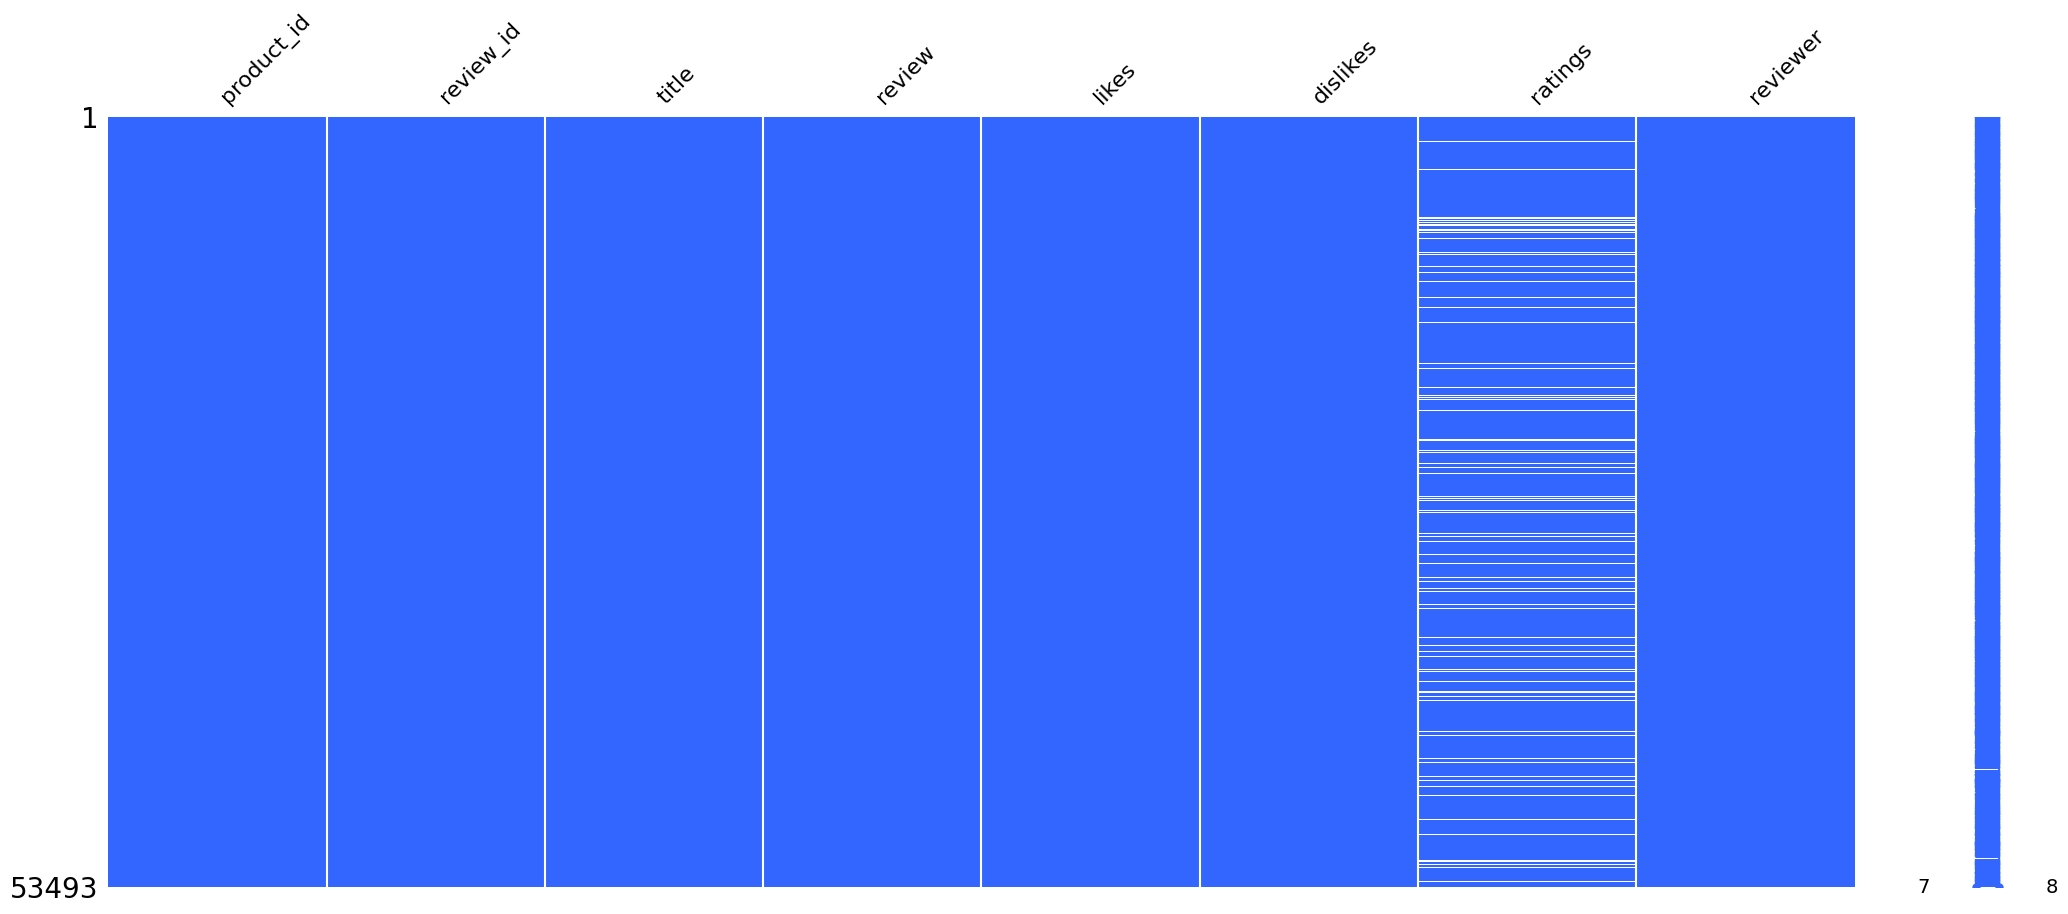

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()


We can handle missing values using lots of techniques like simple statistical methods, using machine learning models and many more but in this case majority of missing values are from ratings column and we will use that column as label column later so I don't want to fake out or ruin the original distribution of the label data specially so thats why I will be dropping the rows having missing values in column ratings. Dropping technique in never recommended but in this senario I am using it.  

In [ ]:
# Dropping the rows with missing values

df.dropna(inplace=True, axis=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48488 entries, 0 to 287
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  48488 non-null  object
 1   review_id   48488 non-null  object
 2   title       48488 non-null  object
 3   review      48488 non-null  object
 4   likes       48488 non-null  object
 5   dislikes    48488 non-null  object
 6   ratings     48488 non-null  object
 7   reviewer    48488 non-null  object
dtypes: object(8)
memory usage: 3.3+ MB


<Figure size 2500x2000 with 0 Axes>

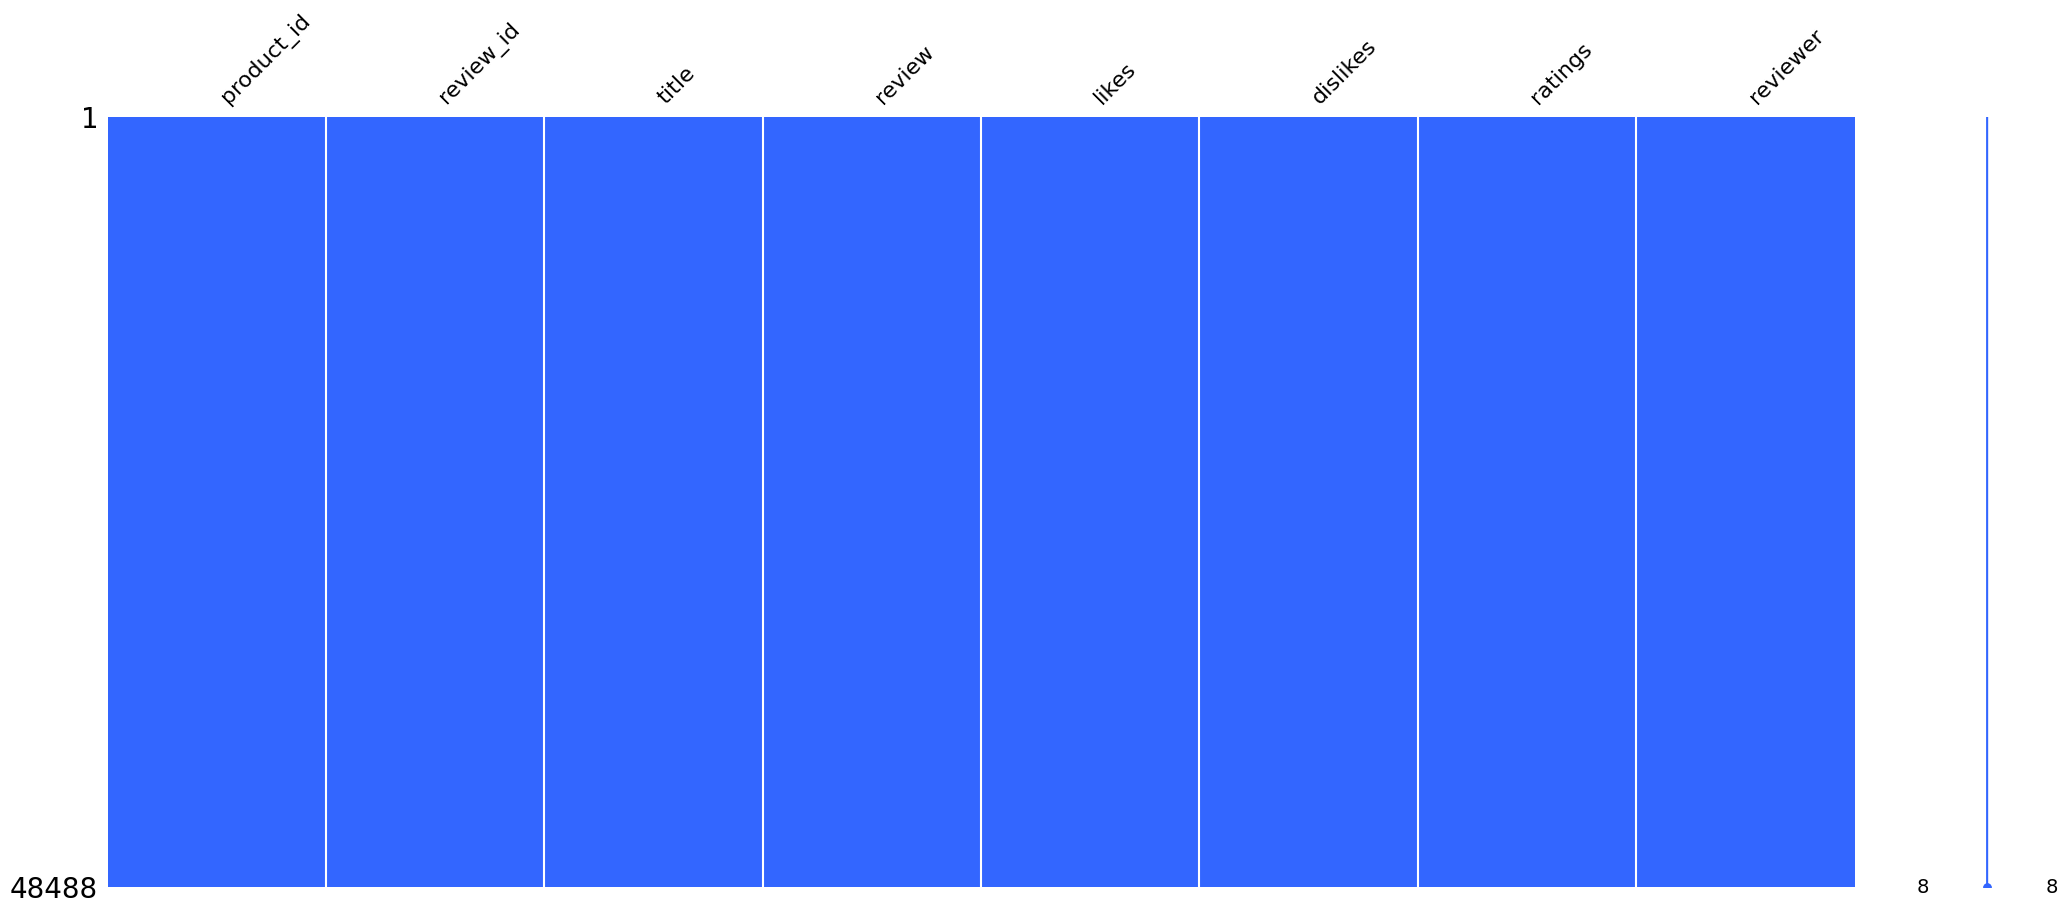

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df, color=[0.2, 0.4, 1])
plt.show()


I Guess We are done with Data Acquisition task lets move to the next phase of the natural language processing **Text-Cleaning**

<h1  style="text-align: center" class="list-group-item list-group-item-action active">3. Text Cleaning </h1><a id = "3" ></a>

Text Cleaning is the process of extracting raw text from input data and converting it to the required encoding format by removing all non-textual material like markups and metadata. This is usually determined by the data format of the organisation (e.g., static data from PDF, HTML).

Text cleaning is an important step in any NLP effort. And it may consume the majority of your project's time. We will discuss following techniques in upcoming subsections of text cleaning.

- HTML Parsing and Cleanup
- Unicode Normalization
- Spelling Correction

<h2  style="text-align: center" class="list-group-item list-group-item-success"> 3.1 Removing URLs </h2><a id = "3.1" ></a>

URLs in the raw text can cause confusions to a NLP model and also they don't have any contextual meaning so better alternative is to remove these URLs from the raw text.

In [ ]:
import re


def remove_url(text):
    text = re.sub(r"http\S+", "", text)
    return text


# Example string with weird font characters plus an URL which we gonna remove.
sample = "ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 \n https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜"
print(f"Text before removing url:- \n {sample}")

sample = remove_url(sample)
print(f"Text after removing url:- \n {sample}")


Text before removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
 https://www.kaggle.com/nkitgupta 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after removing url:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜


<h2  style="text-align: center" class="list-group-item list-group-item-success"> 3.2 Unicode Normalization </h2><a id = "3.2" ></a>

Before we go into what is Unicode Normalization lets first discuss why do we need unicode normalization. Consider the following example with some weird font:-

String 1 : ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜

String 2 : Hi everyone I am Ankit Gupta Having the following Kaggle profile and I am 😊 to create this notebook.

Above string 1 is written in some weird font and it also have an emoji so these kind of things can easily confuse a NLP model because model will treat both string 1 and string 2 differently although they represent same semantic meaning. To overcome this problem we do **unicode normalization**.

We need to handle these kinds of characters because many people on their social media posts use these kind of fonts. And primary source of data used in any NLP task is social media.

Now we are good to discuss how we do **unicode normalization**.

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 3.2.1 The Issue of Equivalence</h3><a id = "3.2.1" ></a>

When two or more characters have same semantic meaning but their representations are not same then we call it the **issue of Equivalence**. It is of 2 types compatibility equivalence, and canonical equivalence.

**(a) Compatibility Equivalence**

We identify compatible equivalence among a wide range of characters, some of which are abstract and others of which we see frequently.


| | | Equivalence Reason |
| --- | --- | --- |
| ℌ | H | Font variant |
| \[NBSP\] | \[SPACE\] | Both are linebreak sequences |
| ① | 1 | Circled variant |
| x² | x2 | Superscript |
| xⱼ | xj | Subscript |
| ½ | 1/2 | Fractions |

In Above table words are having different characters representations but same semantic meaning. Our Objective is that model treats both "𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜", "I am happy to create this notebook" the strings in the same way.

Consider this Example

In [ ]:
print("\u00C7", "\u0043\u0327")


Ç Ç


In [ ]:
"\u00C7" == "\u0043\u0327"


False

In [ ]:
"Ç" == "Ç"


False

**(b) Canonical Equivalence**

Canonical equivalency is more difficult to discover since it involves characters which appear to be identical when rendered but are actually wholly separate characters.

| | | Equivalence Reason |
| --- | --- | --- |
| Ç | C◌̧ | Combined character sequences |
| 가 | ᄀ ᅡ | Conjoined Korean characters |



Our approach to canonical and compatibility equivalence difficulties is Unicode normalisation. There are two sorts of conversions and two directions for normalizing. Canonical and compatibility are the two sorts we've already discussed. Decomposition and composition will be what we gonna do.

**Decomposition** :- In Decomposition we Decompose the character into many forms. So in the case of our Ç with cedilla we would break both versions of the character down into the two separate characters (Latin capital C + combining cedilla).

**Composition** :- In Composition we merge them into one. In the case of our Ç with cedilla we would merge both versions of the characters up into the one separate characters (Latin capital C + combining cedilla).

We get four possible normalisation forms when we combine these two directions with our two conversion types:

| Name | Abbreviation | Description | Example |
| --- | --- | --- | --- |
| Form D | NFD | *Canonical* decomposition | `Ç` → `C ̧` |
| Form C | NFC | *Canoncial* decomposition followed by *canonical* composition | `Ç` → `C ̧` → `Ç` |
| Form KD | NFKD | *Compatibility* decomposition | `ℌ ̧` → `H ̧` |
| Form KC | NFKC | *Compatibility* decomposition followed by *canonical* composition | `ℌ ̧` → `H ̧` → `Ḩ` |

In this notebook I Will be using NFKD approach this is the one we use more frequently in NLP.

For the more detailed understanding of the above mentioned composition decomposition approach read this beautiful blog post about


In [ ]:
import unicodedata as uni

print(f"Text before Unicode Normalization:- \n {sample}")

sample = uni.normalize('NFKD', sample)
print(f"Text after Unicode Normalization:- \n {sample}")


Text before Unicode Normalization:- 
 ℍ𝕚 𝔼𝕧𝕖𝕣𝕪𝕠𝕟𝕖 𝕀 𝕒𝕞 𝔸𝕟𝕜𝕚𝕥 𝔾𝕦𝕡𝕥𝕒 𝕙𝕒𝕧𝕚𝕟𝕘 𝕥𝕙𝕖 𝕗𝕠𝕝𝕝𝕠𝕨𝕚𝕟𝕘 𝕂𝕒𝕘𝕘𝕝𝕖 𝕡𝕣𝕠𝕗𝕚𝕝𝕖 
  𝕒𝕟𝕕 𝕀 𝕒𝕞 😊 𝕥𝕠 𝕔𝕣𝕖𝕒𝕥𝕖 𝕥𝕙𝕚𝕤 𝕟𝕠𝕥𝕖𝕓𝕠𝕠𝕜
Text after Unicode Normalization:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook


We successfully removed compatibility equivalence from the above example 🥳🥳. Our Next Task is to handle these emojis.

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 3.2.2 Handling Emoji ‘😍😍’ & Emoticon ‘ :) ’</h3><a id = "3.2.2" ></a>

We need to handle emojis because they store lots of important information about the sentiment of the text we dont't want to lose this information by just removing them from the text. There are lots of ways to handle them in this notebook I am replacing them with their English version using python library "demoji".

**What is an Emoji 🤔?**

Emojis are small digital images or icons that are used to convey a message or emotion. These are small enough to be inserted into a text document. "e" stands for image, while "moji" stands for character in Japanese.

Consider the example of Emoji Handling


I ❤ 🍔 so much

English version of above comment is

I love burger so much

**What is an Emoticon ‘ :-) ’?**

An emoticon is a combination of the words "emotion" and "icon." It is a keyboard depiction of a facial expression, such as a smile or frown, that is used to indicate the writer's feelings or intended tone.

Examples-
:-)   Smile

;-)   Smile with a wink


In [ ]:
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
import demoji


def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string


print(f"Before Handling emoji:- \n {sample}")
print(f"After Handling emoji:- \n {handle_emoji(sample)}")


Before Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am 😊 to create this notebook
After Handling emoji:- 
 Hi Everyone I am Ankit Gupta having the following Kaggle profile 
  and I am  smiling face with smiling eyes to create this notebook


For the more detailed understanding of the above mentioned emoji handling approach read this beautiful blog post about

[How to handle Emoji ‘😄’ & Emoticon ‘ :-) ’ in text preprocessing?](https://medium.com/geekculture/text-preprocessing-how-to-handle-emoji-emoticon-641bbfa6e9e7) By Paritosh Mahto.


<h2  style="text-align: center" class="list-group-item list-group-item-success"> 3.3 Spelling Correction </h2><a id = "3.3" ></a>

Due to fast typing or fat finger typing many people experience spelling mistakes. For a NLP model understanding of the context is very important is spelling got wrong then whole context of the text may get wrong. We will do spelling correction using pyspellchecker a python library.

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()

# Add misspelled words to the list
misspelled_words = ["nsme", "mobiile", "phoone"]
print(f" Misspelled words before correction:- \n {misspelled_words}")
print(f" Misspelled words after correction")
for word in misspelled_words:
    # Get the one `most likely` answer
    print(spell.correction(word))


In [ ]:
spell.correction("nsme")

For the more detailed understanding of the above mentioned Spelling Correction approach read this beautiful blog post about

[Spelling checker in Python](https://www.geeksforgeeks.org/spelling-checker-in-python/)


<h1  style="text-align: center" class="list-group-item list-group-item-action active">4. Text Pre-Processing </h1><a id = "4" ></a>

In the previous section we covered the text extraction and cleaning phase of a NLP project. Question may arise if we did the cleaning and extraction task then why do we need text-preprocessing phase. Answer is pretty simple any NLP project consist of modelling phase in which we train the model so that we can use it for real world data. And model needs numerical data but our data is textual so that's why we have to do various text preprocessing task.

Below I mentioned few pre-processing tasks:-

- **Preliminaries**
    - Sentence segmentation and word tokenization.
- **Frequent steps**
    - Stop word removal, stemming and lemmatization, removing digits/punctuation, lowercasing, etc.
- **Other steps**
    - Normalization, language detection, code mixing, transliteration, etc.
- **Advanced processing**
    - POS tagging, parsing, coreference resolution, etc.

above mentioned task vary according to the task or model we wil use.

<h2  style="text-align: center" class="list-group-item list-group-item-success"> 4.1 Preliminaries </h2><a id = "4.1" ></a>

Any NLP based task can be done by breaking the text into words(tokens) and sentences. So now we have to focus on breaking the text into sentences first (**Sentence Tokenization**) and then into words (**Word Tokenization**).

But in our case we are not dealing with task with such a big textual data that need to be first break into sentences, in our case we already have the sentences so we just have to proceed with the word tokenization.

In [ ]:
def word_tokenizer(text):
    text = text.lower()
    text = text.split()

    return text


sample = "Hi Everyone I am Ankit Gupta."
print(sample)
print(word_tokenizer(sample))


Hi Everyone I am Ankit Gupta.
['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']


For identifying specific patterns (e.g., dates or money expressions), well-formed regular expressions are the first step. In many practical scenarios, we may end up using a custom tokenizer or sentence segmenter that suits our text structure instead of or on top of an existing one available in a standard NLP library.

<h2  style="text-align: center" class="list-group-item list-group-item-success"> 4.2 Frequent Steps </h2><a id = "4.2" ></a>

Let's have a look at some more common NLP pipeline pre-processing activities. Assume we're developing software that classifies news articles into one of four categories: politics, sports, business, or other. Assume we've got a decent sentence segmenter and tokenizer in place. At that point, we'd have to consider what kind of data might be valuable in constructing a categorization tool. Some commonly used English terms, such as a, an, the, of, in, and so on, aren't especially beneficial for this purpose because they don't carry enough substance to distinguish between the four categories on their own. **Stop words** are words that are typically (but not always) eliminated from further processing in problem scenarios like this.

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 4.2.1 Removing Stop Words </h3><a id = "4.2.1" ></a>

In [ ]:
# from nltk.corpus import stopwords

# en_stopwords = set(stopwords.words('english'))
# print(f"Stop Words in English : \n{ en_stopwords}")

import nltk
from nltk.corpus import stopwords

en_stopwords = set(stopwords.words('english'))
print(en_stopwords)


{'its', 'should', 'where', 'such', 'himself', 'a', 'other', 'just', 'hasn', 'needn', 'few', "haven't", "you're", 'mustn', 'his', 'below', 'as', 'themselves', 'under', 'during', 'same', 'this', 'now', 'don', 'while', "it's", 'each', 'yourselves', 'am', 'didn', "isn't", 'then', 'above', 'from', "mustn't", 'whom', 'up', "didn't", 'both', "shouldn't", 'off', 'only', 'mightn', 'some', 'there', 'ourselves', 'them', 'hadn', 'which', 'further', 'herself', 'because', 'theirs', 'what', 'are', 'have', 'to', 'o', 'weren', 'in', 'out', 'on', 'most', 'we', 'before', 'once', 'is', 'ma', "shan't", 'not', 'through', 'but', 'why', 'y', 'couldn', 'down', "you'll", 'been', 'i', 'very', 'too', 'having', 'm', 'ain', 'at', 'here', 's', 'so', 'your', 'shan', 'the', 'isn', 'her', 'against', "hadn't", 'those', 'our', 'haven', 'yourself', 'be', 'can', 'between', 'has', 'into', 'ours', 'aren', 'was', 'their', 're', 'wasn', 'for', 'll', "hasn't", 'won', 'yours', 'of', 'how', "don't", 'itself', 'being', 'he', 'who'

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text


print(f"Before removing stopwords : {word_tokenizer(sample)}")
print(f"After removing stopwords : {remove_stopwords(word_tokenizer(sample))}")


Before removing stopwords : ['hi', 'everyone', 'i', 'am', 'ankit', 'gupta.']
After removing stopwords : ['hi', 'everyone', 'ankit', 'gupta.']


<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 4.2.2 Stemming</h3><a id = "4.2.2" ></a>

**Stemming** refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., “dog” and “dogs” are both reduced to “dog”). This is accomplished by applying a fixed set of rules (e.g., if the word ends in “-es,” remove “-es”). More such examples are shown in below Figure.



In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

stemmer = PorterStemmer()
# stemmer = LancasterStemmer()


def stemming(text):

    text = [stemmer.stem(word) for word in text]
    return text


sample = "I am creating a Notebook"
print(f"Before Stemming : {(sample)}")
print(f"After Stemming : {stemming(word_tokenizer(sample))}")


Before Stemming : I am creating a Notebook
After Stemming : ['i', 'am', 'creat', 'a', 'notebook']


Stemming is just removing the suffix to get the base form of the word but the resultant word is not desired results, I mean to say when we will use word embeddings later then it may affect badly. So we need to look for the alternative for stemming and that is lemmatization it gets the word's base form on the basis of its context.

![](https://stringfixer.com/files/107654628.jpg)



<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 4.2.3 Lemmatization</h3><a id = "4.2.3" ></a>

Lemmatization is the process of mapping all the different forms of a word to its base word, or lemma. While this seems close to the definition of stemming, they are, in fact, different. For example, the adjective “better,” when stemmed, remains the same. However, upon lemmatization, this should become “good,” as shown in Figure below.




Lemmatization requires more linguistic knowledge, and modeling and developing efficient lemmatizers remains an open problem in NLP research even now.

In [ ]:
!python -m spacy download en


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

sp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatization(text):

    # text = [sp(word).lemma_ for word in text]

    text = " ".join(text)
    token = sp(text)

    text = [word.lemma_ for word in token]
    return text


print(f"Before Lemmatization : {word_tokenizer(sample)}")
print(f"After Lemmatization : {lemmatization(word_tokenizer(sample))}")


Before Lemmatization : ['i', 'am', 'creating', 'a', 'notebook']
After Lemmatization : ['I', 'be', 'create', 'a', 'notebook']


Keep in mind that not all of these procedures are always required, and not all of them must be completed in the sequence listed. When removing numerals and punctuation, for example, the order in which they are eliminated may not matter. However, Before stemming, we usually lowercase the text.

And before lemmatization We don't take tokens away either. Because we need to know which part of the text to lemmatize, we must lowercase it first. To get the lemma of a word, it must be said, and all tokens in the phrase must be intact.


Preparing a sequential list of pre-processing chores is a recommended practice to follow, must be completed once we have a firm grasp on how to handle our data.

<h2  style="text-align: center" class="list-group-item list-group-item-success"> 4.3 Other Pre-Processing Steps </h2><a id = "4.3" ></a>


In an NLP pipeline, we've seen a few common pre-processing processes so far. We have presumed that we are dealing with standard English text despite the fact that the nature of the texts has not been expressly mentioned. What makes a difference if this isn't the case? Using a few examples, let's explain a few more pre-processing processes to deal with such instances.

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 4.3.1 Language Detection</h3><a id = "4.3.1" ></a>


These day lot of information on web are multi language. But we assumed text to be in English only on that assumption we have constructed the pipeline. So what now, we just need to add another component to the pipeline at its start for **language detection**

We can use libraries like Pycld2 for language detection. Once this step is done, the next steps could follow a language-specific pipeline.

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 19.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=6755743a251ee1899b780d41e819820bde80fbc13bfb4cadeddf10fb5a7c81b5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect


en_text = u""""Hi Everyone I am Ankit Gupta."""
print(f" {en_text} : {detect(en_text)}")

hindi_text = u"""मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ"""
print(f"{hindi_text} : {detect(hindi_text)}")


 "Hi Everyone I am Ankit Gupta. : tl
मेरा नाम अंकित गुप्ता है और मैं एक छात्र हूँ : hi


<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 4.3.2 Code mixing and transliteration</h3><a id = "4.3.2" ></a>

In previous Section we discussion was about a scenario in which the content was written in a language other than English. Another instance is when a single piece of content is available in multiple languages. Many people all across the world speak multiple languages. Their daily routines As a result, they frequently use many languages. They use multiple languages in their social media posts, and a single post can contain multiple languages. As an example Consider a Hinglish (Hindi Plus English) phrase as an example of code mixing.



**Code mixing refers to this phenomenon of switching between languages. When people use multiple languages in their write-ups, they often type words
from these languages in Roman script, with English spelling.**



**So, the words of another language are written along with English text. This is known as transliteration.**

In [ ]:
from googletrans import Translator

translator = Translator()
translator.translate(hindi_text)

<h2  style="text-align: center" class="list-group-item list-group-item-success"> 4.4 Data Augmentation </h2><a id = "4.4" ></a>

We had the highly biased data. In this case, if we just output that the review is positive then also we will get 95% accuracy. But before the data augmentation approach, we feed this data to a bi-lstm-based model and we got 60-70% of accuracy which was not acceptable. So we did the Data augmentation and generate more negative reviews to balance the data and after that, we got 96-97% accuracy. In this section, I want to discuss what kind of data augmentation we use and what tool.

In [ ]:
df_temp = df.copy()

In [ ]:
# Assigning labels to each review

def label(y):
    if y == '5':
        return 1
    elif y == '4':
        return 1
    else:
        return 0

from tqdm import tqdm

tqdm.pandas()

df_temp['y'] = df_temp.ratings.progress_map(label)

100%|██████████| 48488/48488 [00:00<00:00, 860308.18it/s]


In [ ]:
df_temp = df_temp[['review', 'y', 'ratings']]

In [ ]:
df_temp.head()

,review,y,ratings
0,Wow superb I love it❤️👍 battery backup so nice 👍👍,1,5
1,Mobile So Good In Range Redmi 9a Has Miui 12 L...,1,4
2,Wonderful device and smart phone best camera b...,1,5
3,Very good mobile. Value for money. Battery bac...,1,5
4,Really great.... value for money...,1,5


In [ ]:
df_temp.y.value_counts()

y
1    44751
0     3737
Name: count, dtype: int64

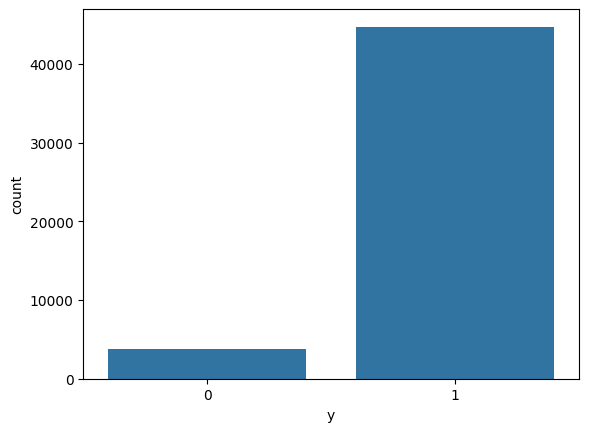

In [ ]:
import seaborn as sns

sns.countplot(x = "y", data = df_temp)
plt.show()

We do not have much of negative comments. We will use data augmentation to create more data our methodology will be we take sentences having 5 star rating and then select the reviews of length in the range of 20 to 30 words.  

After havving these positive reviews we will use Antonym Augmentation to generate negative reviews.

In [ ]:
df_temp2 = df_temp[(df_temp['ratings'] == '5')]

In [ ]:
positive = list(df_temp2[(df_temp2['review'].str.len() > 100) & (df_temp2['review'].str.len() < 350)]['review'])
len(positive)

4803

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 5.4 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word as naw

We used Python’s NLPAug to do the data augmentation task. First, we choose positive reviews of 100-350 character lengths which were 4803. Just have a look at few of the reviews in below shown image.

In [ ]:
positive[41:49]

["An amazing smartphone for the price though i didn't like the colors compared to a realme phone in the same price range. It's a reall good second smartphone if you already have a primary device.",
 "Nice product according to its budget. But it's hard to play high Graphics games like pubg on 3GB RAM. It lags even when you play at Smooth Graphics settings. If this is for gaming (High graphics game) purpose, then don't go for 3GB or 2 GB RAM and the rest it works very well.",
 'I gave this phone to my wife as a gift and she loved it so much that she gets great performance and photos of games',
 'Every thing is great about the phone but a micro USB connector with a 5000 mah battery kind of suck a type c connector would have been better',
 'Very good handset at this price. Nice and great performance. Battery backup is also trustworthy. There is no issue till date after using for a period of 5days. Overall u can buy this phone without hesitation',
 'I am happy with your productus policy of 

In [ ]:
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=en_stopwords, tokenizer=None,
                     reverse_tokenizer=None, stopwords_regex=None, verbose=0)

aug_negative = aug.augment(positive)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
len(aug_negative)

4803

After having 4803 positive reviews we applied word level augmentation specifically Antonym Augmentation which changes the context of the word (make them opposite of that).
Using this we got around 4803 negative reviews as well hence the balanced data. Have a look at the negative version of the above positive reviews.

In [ ]:
aug_negative[41:49]

["An amazing smartphone for the price though i didn ' t like the colors compared to a realme phone in the same price range. It ' s a reall bad second smartphone if you already have a secondary device.",
 "Nice product according to its budget. But it ' s hard to play low Graphics games like pubg on 3GB RAM. It lags even when you play at Smooth Graphics settings. If this is for gaming (Low graphics game) purpose, then don ' t stop for 3GB or 2 GB RAM and the rest it idle very badly.",
 'I take this phone to my wife as a gift and she hate it so little that she end great performance and photos of games',
 'Every thing is great about the phone but a micro USB connector with a 5000 mah battery kind of suck a type c connector would have been ill',
 'Very evil handset at this price. Nice and great performance. Battery backup is also untrustworthy. There is no issue till date after using for a period of 5days. Overall u can sell this phone without hesitation',
 'I am unhappy with your productus

In [ ]:
df_negative = pd.DataFrame({"review" : aug_negative, 'y' : [0]*len(aug_negative)})

In [ ]:
df_positive = pd.DataFrame({"review" : positive, 'y' : [1]*len(positive)})

Concatination both negative and positive sentences

In [ ]:
df_temp = pd.concat([df_negative, df_positive]).sample(frac = 1, random_state = 11).reset_index(drop=True)

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9606 entries, 0 to 9605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9606 non-null   object
 1   y       9606 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 150.2+ KB


In [ ]:
df_temp.head()

,review,y
0,great phone in budget. .. pubg performance was...,0
1,Best Smartphone by Mi in this Range. . stop fo...,0
2,Bad smooth phone. . and back camera quality is...,0
3,Thise is very nice mobile ...I like it very mu...,1
4,I m meagerly dissatisfy 👍 All section r superb...,0


In [ ]:
df = df_temp

Applying Text cleaning and preprocessing on whole dataset

In [ ]:
def preprocessing(text):

    text = remove_url(text)
    text = uni.normalize('NFKD', text)
    text = handle_emoji(text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = word_tokenizer(text)
    # text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

In [ ]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review'] = df['review'].progress_map(preprocessing)

100%|██████████| 9606/9606 [01:57<00:00, 81.72it/s]


In [ ]:
df.head()

,review,y,clean_review
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...
1,Best Smartphone by Mi in this Range. . stop fo...,0,well smartphone mi range stop r confuse samsun...
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality evil rear...
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...
4,I m meagerly dissatisfy 👍 All section r superb...,0,I meagerly dissatisfy thumb section r superb d...


In [ ]:
reviews = df.clean_review.values.tolist()


Prepare data for LDA Analysis
Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [ ]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 9606/9606 [00:00<00:00, 261704.69it/s]


In [ ]:
df.head()

,review,y,clean_review,clean_review2
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...,"[great, phone, budget, pubg, performance, roug..."
1,Best Smartphone by Mi in this Range. . stop fo...,0,well smartphone mi range stop r confuse samsun...,"[well, smartphone, mi, range, stop, r, confuse..."
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality evil rear...,"[bad, smooth, phone, back, camera, quality, ev..."
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...,"[thise, nice, mobile, i, like, much, delivery,..."
4,I m meagerly dissatisfy 👍 All section r superb...,0,I meagerly dissatisfy thumb section r superb d...,"[i, meagerly, dissatisfy, thumb, section, r, s..."


Now as our dataset is unlabeled so we need an algorithm that can get labels to us. We will use the following algorithm (LDA) to do so. We will use Topic Modeling Technique to find aspects from the reviews.

In general, topic modelling refers to a set of unsupervised statistical learning methods for detecting latent topics in a large number of text texts. Latent Dirichlet allocation (LDA), latent semantic analysis (LSA), and probabilistic latent semantic analysis are three prominent topic modelling algorithms (PLSA). LDA is the most widely employed approach in practise. And we will too gonna use LDA for our analysis

<h1  style="text-align: center" class="list-group-item list-group-item-action active">5. Latent Dirichlet Allocation (LDA) </h1><a id = "5" ></a>


**What does LDA do? Let’s start with a toy corpus.**

Consider the following collection of documents, D1 to D5, and each document consists of a one sentence:

• D1: I like these mobile phones.
• D2: Battery backup for this phone is great and camera quality is an add on feature.
• D3: Look at the front camera I guess it is better than the rear camera.
• D4: Processing Speed of this phone is great.
• D5: I Like the battery most in this phone but I am not satisfied with the service of this company.

Learning a topic model on this collection using LDA may produce an output like this:

• Topic A: 30% battery, 15% camera, 10% Processor, 10% Service.
• Topic B: 20% Rear Camera, 20% Front Camera, 20% Service, 20% Processor
• Document 1 and 2: 100% Topic A
• Document 3 and 4: 100% Topic B
• Document 5: 60% Topic A, 40% Topic B

Topics are just a collection of keywords with a probability distribution, while documents are collections of topics with the same probability distribution. A topic model just provides a list of keywords for each topic. What is the situation?Human perception of what an issue symbolises and what it should be labelled is common in the context of an LDA model.

In [ ]:
data_words = df['clean_review2'].values.tolist()
len(data_words)

9606

You could refer this blog post to understand LDA more nicely.

[Topic Modeling in Python: Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]


In [ ]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[(0,
  '0.050*"phone" + 0.033*"good" + 0.027*"i" + 0.019*"price" + 0.015*"one" + '
  '0.013*"flipkart" + 0.013*"battery" + 0.012*"product" + 0.012*"camera" + '
  '0.012*"performance"'),
 (1,
  '0.060*"phone" + 0.054*"i" + 0.022*"camera" + 0.016*"bad" + 0.015*"evil" + '
  '0.014*"product" + 0.014*"awesome" + 0.013*"use" + 0.013*"price" + '
  '0.013*"battery"'),
 (2,
  '0.062*"good" + 0.038*"phone" + 0.032*"camera" + 0.027*"i" + 0.020*"mobile" '
  '+ 0.020*"battery" + 0.018*"flipkart" + 0.017*"product" + 0.016*"also" + '
  '0.015*"price"'),
 (3,
  '0.050*"face" + 0.050*"smile" + 0.040*"phone" + 0.026*"i" + 0.018*"product" '
  '+ 0.015*"good" + 0.014*"bad" + 0.014*"eye" + 0.013*"money" + '
  '0.013*"camera"'),
 (4,
  '0.042*"camera" + 0.033*"battery" + 0.032*"good" + 0.027*"phone" + '
  '0.026*"quality" + 0.024*"display" + 0.020*"bad" + 0.019*"awesome" + '
  '0.018*"performance" + 0.015*"price"'),
 (5,
  '0.026*"ok" + 0.024*"i" + 0.024*"thumb" + 0.022*"good" + 0.019*"hand" + '
  '0.018*"c

As we don't have labeled data so we need to make few assumptions regarding choosing of aspect from the comment. From above analysis using LDA we inerpret that below listed aspect are few important one which were mentioned in most of the comments.
- Phone
- Camera
- Battery
- Delivery
- Processor

We gonna create a similarity matrix now using python's gensim.


In [ ]:
%%time
from gensim.models import FastText
fasttext_model = FastText(data_words, vector_size= 100, window=5, min_count=5, workers=4,sg=1)
# fasttext_model = FastText.load_fasttext_format("../input/fast100/cc.en.100.bin")

CPU times: user 12.3 s, sys: 180 ms, total: 12.5 s
Wall time: 8.01 s


In [ ]:
fasttext_model.save("FastText-Model-For-ABSA.bin")

In [ ]:
fasttext_model.wv.n_similarity("I really like the camera of this phone", "battery")

0.9486718

In [ ]:
fasttext_model.wv.n_similarity("I really like the camera of this phone", "camera")

0.88043016

In [ ]:
aspects = ["phone", "camera", "battery", "delivery", "processor"]

def get_similarity(text, aspect):
    try:
        text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0s


In [ ]:
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    df[aspect] = df['clean_review2'].progress_map(lambda text: get_similarity(text, aspect))

100%|██████████| 9606/9606 [00:12<00:00, 796.19it/s]


In [ ]:
df.head()

,review,y,clean_review,clean_review2,phone,camera,battery,delivery,processor
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...,"[great, phone, budget, pubg, performance, roug...",0.907624,0.872704,0.952889,0.907393,0.898340
1,Best Smartphone by Mi in this Range. . stop fo...,0,well smartphone mi range stop r confuse samsun...,"[well, smartphone, mi, range, stop, r, confuse...",0.888178,0.824624,0.945098,0.946274,0.860255
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality evil rear...,"[bad, smooth, phone, back, camera, quality, ev...",0.871424,0.895553,0.960905,0.942757,0.914466
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...,"[thise, nice, mobile, i, like, much, delivery,...",0.858715,0.839954,0.914012,0.963975,0.851284
4,I m meagerly dissatisfy 👍 All section r superb...,0,I meagerly dissatisfy thumb section r superb d...,"[i, meagerly, dissatisfy, thumb, section, r, s...",0.845053,0.860574,0.962773,0.968073,0.891783


In [ ]:
df.to_csv("Clean_Flipkart_Product.csv", index = False)

As of now we are done of choosing the aspects for each respective review. Now our next step will be to create an pytorch based model which can predict aspect based sentiment.

--------------------------------------------
----------------

<h1  style="text-align: center" class="list-group-item list-group-item-action active">6. Model </h1><a id = "6" ></a>

We are done with aspect identification next we will create a model to predict sentiments on the basis of these aspects.

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
import warnings

<h2  style="text-align: center" class="list-group-item list-group-item-success"> 6.1 Configurations </h2><a id = "6.1" ></a>

In [ ]:
class config:
    warnings.filterwarnings("ignore", category = UserWarning)
    IMG_SIZE = (224,224)
    DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
    FOLDS = 5
    SHUFFLE = True
    BATCH_SIZE = 32
    LR = 0.01
    EPOCHS = 30
    EMB_DIM = 100
    MAX_LEN = 20
    MODEL_PATH = "./Models/MyModel.pt"

In [ ]:
# df = pd.read_csv("../input/mimobilereviews/Clean_Flipkart_Product.csv")
df.head()

,review,y,clean_review,clean_review2,phone,camera,battery,delivery,processor
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...,"[great, phone, budget, pubg, performance, roug...",0.907624,0.872704,0.952889,0.907393,0.898340
1,Best Smartphone by Mi in this Range. . stop fo...,0,well smartphone mi range stop r confuse samsun...,"[well, smartphone, mi, range, stop, r, confuse...",0.888178,0.824624,0.945098,0.946274,0.860255
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality evil rear...,"[bad, smooth, phone, back, camera, quality, ev...",0.871424,0.895553,0.960905,0.942757,0.914466
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...,"[thise, nice, mobile, i, like, much, delivery,...",0.858715,0.839954,0.914012,0.963975,0.851284
4,I m meagerly dissatisfy 👍 All section r superb...,0,I meagerly dissatisfy thumb section r superb d...,"[i, meagerly, dissatisfy, thumb, section, r, s...",0.845053,0.860574,0.962773,0.968073,0.891783


<h2  style="text-align: center" class="list-group-item list-group-item-success"> 6.2 Dataset Generator </h2><a id = "6.2" ></a>

<h3  style="text-align: center" class="list-group-item list-group-item-warning"> 6.2.1 Creation of the Vocabulary </h3><a id = "6.2.1" ></a>

In [ ]:
class Vocabulary:

    '''
    __init__ method is called by default as soon as an object of this class is initiated
    we use this method to initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold, max_size):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent words and discard others
        '''
        #initiate the index to token dict
        ## <PAD> -> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch
        ## <SOS> -> start token, added in front of each sentence to signify the start of sentence
        ## <EOS> -> End of sentence token, added to the end of each sentence to signify the end of sentence
        ## <UNK> -> words which are not found in the vocab are replace by this token
        self.itos = {0: '<PAD>', 1:'<SOS>', 2:'<EOS>', 3: '<UNK>'}
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()}

        self.freq_threshold = freq_threshold
        self.max_size = max_size

    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)

    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    @staticmethod
    def tokenizer(text):
        return [tok.lower().strip() for tok in text.split(' ')]

    '''
    build the vocab: create a dictionary mapping of index to string (itos) and string to index (stoi)
    output ex. for stoi -> {'the':5, 'a':6, 'an':7}
    '''
    def build_vocabulary(self, sentence_list):
        #calculate the frequencies of each word first to remove the words with freq < freq_threshold
        frequencies = {}  #init the freq dict
        idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk

        #calculate freq of words
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                if word not in frequencies.keys():
                    frequencies[word]=1
                else:
                    frequencies[word]+=1


        #limit vocab by removing low freq words
        frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold}

        #limit vocab to the max_size specified
        frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) # idx =4 for pad, start, end , unk

        #create vocab
        for word in frequencies.keys():
            self.stoi[word] = idx
            self.itos[idx] = word
            idx+=1


    '''
    convert the list of words to a list of corresponding indexes
    '''
    def numericalize(self, text):
        #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['<UNK>'])

        return numericalized_text


In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    '''
    Initiating Variables
    df: the training dataframe
    source_column : the name of source text column in the dataframe
    transform : If we want to add any augmentation
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    source_vocab_max_size : max source vocab size
    '''

    def __init__(self, df, source_column,freq_threshold = 3,
                source_vocab_max_size = 10000 , transform=None):

        self.df = df
        self.transform = transform

        #get source and target texts
        self.source_texts = self.df[source_column]


        ##VOCAB class has been created above
        #Initialize source vocab object and build vocabulary
        self.source_vocab = Vocabulary(freq_threshold, source_vocab_max_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())


    def __len__(self):
        return len(self.df)

    '''
    __getitem__ runs on 1 example at a time. Here, we get an example at index and return its numericalize source and
    target values using the vocabulary objects we created in __init__
    '''
    def __getitem__(self, index):
        source_text = self.source_texts[index]

        if self.transform is not None:
            source_text = self.transform(source_text)

        #numericalize texts ['<SOS>','cat', 'in', 'a', 'bag','<EOS>'] -> [1,12,2,9,24,2]
        numerialized_source = [self.source_vocab.stoi["<SOS>"]]
        numerialized_source += self.source_vocab.numericalize(source_text)
        numerialized_source.append(self.source_vocab.stoi["<EOS>"])

        #convert the list to tensor and return
        return torch.tensor(numerialized_source), torch.tensor(self.df.y[index])

In [ ]:
df.head()

,review,y,clean_review,clean_review2,phone,camera,battery,delivery,processor
0,great phone in budget. .. pubg performance was...,0,great phone budget pubg performance rough came...,"[great, phone, budget, pubg, performance, roug...",0.907624,0.872704,0.952889,0.907393,0.898340
1,Best Smartphone by Mi in this Range. . stop fo...,0,well smartphone mi range stop r confuse samsun...,"[well, smartphone, mi, range, stop, r, confuse...",0.888178,0.824624,0.945098,0.946274,0.860255
2,Bad smooth phone. . and back camera quality is...,0,bad smooth phone back camera quality evil rear...,"[bad, smooth, phone, back, camera, quality, ev...",0.871424,0.895553,0.960905,0.942757,0.914466
3,Thise is very nice mobile ...I like it very mu...,1,thise nice mobile I like much delivery also fa...,"[thise, nice, mobile, i, like, much, delivery,...",0.858715,0.839954,0.914012,0.963975,0.851284
4,I m meagerly dissatisfy 👍 All section r superb...,0,I meagerly dissatisfy thumb section r superb d...,"[i, meagerly, dissatisfy, thumb, section, r, s...",0.845053,0.860574,0.962773,0.968073,0.891783


In [ ]:
dataset = CustomDataset(df, "clean_review")

In [ ]:
len(dataset.source_vocab.stoi)

3306

Saving the pytorch custom dataset

In [ ]:
import pickle

with open('dataset-new', 'wb') as dataset_file:

  # Step 3
    pickle.dump(dataset, dataset_file, pickle.HIGHEST_PROTOCOL)

# import pickle

# # Step 2
# with open('./dataset', 'rb') as config_dictionary_file:

#     # Step 3
#     config_dictionary = pickle.load(config_dictionary_file)

#     # After config_dictionary is read from file
#     print(config_dictionary)

<h2  style="text-align: center" class="list-group-item list-group-item-success"> 6.3 Word Embeddings </h2><a id = "6.3" ></a>

In [ ]:
def get_emb_layer_with_weights(target_vocab, emb_model, trainable = False):

    weights_matrix = np.zeros((len(target_vocab), config.EMB_DIM))
    words_found = 0

    for i, word in enumerate(target_vocab):
        weights_matrix[i] = np.concatenate([emb_model.wv[word]])
        words_found += 1

    print(f"Words found are : {words_found}")

    weights_matrix = torch.tensor(weights_matrix, dtype = torch.float32).reshape(len(target_vocab), config.EMB_DIM)
    emb_layer = nn.Embedding.from_pretrained(weights_matrix)
    print(emb_layer)
    if trainable:
        emb_layer.weight.requires_grad = True
    else:
        emb_layer.weight.requires_grad = False

    return emb_layer

In [ ]:
class MyCollate:
    def __init__(self, pad_idx, maxlen):
        self.pad_idx = pad_idx
        self.maxlen = maxlen


    #__call__: a default method
    ##   First the obj is created using MyCollate(pad_idx) in data loader
    ##   Then if obj(batch) is called -> __call__ runs by default
    def __call__(self, batch):
        #get all source indexed sentences of the batch
        source = [item[0] for item in batch]
        #pad them using pad_sequence method from pytorch.
#         source = pad_sequence(source, batch_first=False, padding_value = self.pad_idx)

        padded_sequence = torch.zeros((self.maxlen, len(batch)), dtype = torch.int)

        for idx, text in enumerate(source):

            if len(text) > self.maxlen:
                padded_sequence[:, idx] = source[idx][: self.maxlen]
            else:
                padded_sequence[:len(source[idx]), idx] = padded_sequence[:len(source[idx]), idx] + source[idx]


        #get all target indexed sentences of the batch
        target = [item[1] for item in batch]

        target = torch.tensor(target, dtype = torch.float32).reshape(-1)
        return padded_sequence, target


<h2  style="text-align: center" class="list-group-item list-group-item-success"> 6.4 Initializing the Model </h2><a id = "6.4" ></a>



In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_layer):
        super().__init__()
#         self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.hidden_dim = hidden_dim
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = True)
        self.fc1 = nn.Linear(2*hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()



    def forward(self, text):

        max_len, N = text.shape
        hidden = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        memory = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        hidden = hidden.to(config.DEVICE)
        memory = memory.to(config.DEVICE)
        embedded = self.embedding(text)
        output, hidden = self.lstm(embedded, (hidden, memory))
#         assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        y_pred = output[-1,:,:]
        y_pred = self.fc1(y_pred)
        y_pred = self.fc2(y_pred)
        y_pred = self.sigmoid(y_pred)

        return y_pred

 <h2  style="text-align: center" class="list-group-item list-group-item-success"> 6.5 Training and K-fold Cross Validation </h2><a id = "6.5" ></a>

In [ ]:
def train_epochs(dataloader,model, loss_fn, optimizer):
    train_correct = 0
    train_loss = 0

    model.train()

    for review, label in tqdm(dataloader):

        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        optimizer.zero_grad()
        output = model(review)
        output = output.reshape(-1)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        train_correct += (prediction == label).float().sum()

    return train_loss, train_correct



In [ ]:
def val_epochs(dataloader, model, loss_fn):
    val_correct = 0
    val_loss = 0

    model.eval()
#     hidden = model.init_hidden(config.BATCH_SIZE)

    for review, label in dataloader:

        review, label = review.to(config.DEVICE), label.to(config.DEVICE)

        output = model(review)
        output = output.reshape(-1)

        loss = loss_fn(output, label)

        val_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        val_correct += (prediction == label).float().sum()
#         prediction =
    return val_loss, val_correct



Words found are : 3306
Embedding(3306, 100)
-----------------------------------------------------------0-fold of the model-----------------------------------------------------------


100%|██████████| 241/241 [00:02<00:00, 80.36it/s] 


| Train Loss : 0.6921256415735987 |  Val Loss : 0.689213560101393 | Train Acc : 52.03019332885742 | Val Acc : 57.232051849365234 |


100%|██████████| 241/241 [00:01<00:00, 198.46it/s]


| Train Loss : 0.6868038559754276 |  Val Loss : 0.6824453685211713 | Train Acc : 56.71525573730469 | Val Acc : 49.2715950012207 |


100%|██████████| 241/241 [00:01<00:00, 204.50it/s]


| Train Loss : 0.6378702585551963 |  Val Loss : 0.458069413094069 | Train Acc : 65.68193817138672 | Val Acc : 87.40895080566406 |


100%|██████████| 241/241 [00:01<00:00, 202.70it/s]


| Train Loss : 0.4009336595933056 |  Val Loss : 0.21256019261110337 | Train Acc : 83.81051635742188 | Val Acc : 91.7793960571289 |


100%|██████████| 241/241 [00:01<00:00, 205.57it/s]


| Train Loss : 0.27807622860956166 |  Val Loss : 1.350782413016249 | Train Acc : 89.38053131103516 | Val Acc : 56.13943862915039 |


100%|██████████| 241/241 [00:01<00:00, 202.74it/s]


| Train Loss : 0.2230636887039014 |  Val Loss : 0.6113638398407122 | Train Acc : 91.59292602539062 | Val Acc : 72.73673248291016 |


100%|██████████| 241/241 [00:01<00:00, 201.34it/s]


| Train Loss : 0.2101200919235702 |  Val Loss : 0.1404561335909007 | Train Acc : 92.12650299072266 | Val Acc : 94.95317840576172 |


100%|██████████| 241/241 [00:01<00:00, 168.44it/s]


| Train Loss : 0.19164520028138893 |  Val Loss : 0.49746879932163407 | Train Acc : 92.51692199707031 | Val Acc : 80.6451644897461 |


100%|██████████| 241/241 [00:01<00:00, 159.33it/s]


| Train Loss : 0.18003926419336416 |  Val Loss : 0.15033775163692317 | Train Acc : 92.99844360351562 | Val Acc : 94.06867980957031 |


100%|██████████| 241/241 [00:01<00:00, 200.61it/s]


| Train Loss : 0.19199871549839498 |  Val Loss : 0.1329647310380509 | Train Acc : 92.62103271484375 | Val Acc : 95.05723571777344 |


100%|██████████| 241/241 [00:01<00:00, 205.73it/s]


| Train Loss : 0.17321503843301553 |  Val Loss : 0.13119849742513293 | Train Acc : 93.27173614501953 | Val Acc : 95.26535034179688 |


100%|██████████| 241/241 [00:01<00:00, 199.99it/s]


| Train Loss : 0.1728711365133074 |  Val Loss : 0.17436497032828435 | Train Acc : 93.32379150390625 | Val Acc : 92.35172271728516 |


100%|██████████| 241/241 [00:01<00:00, 201.56it/s]


| Train Loss : 0.16916593883859496 |  Val Loss : 0.12724194857878193 | Train Acc : 93.42790985107422 | Val Acc : 95.3173828125 |


100%|██████████| 241/241 [00:01<00:00, 203.98it/s]


| Train Loss : 0.15764848476800367 |  Val Loss : 2.1572244308741606 | Train Acc : 93.79230499267578 | Val Acc : 60.40583419799805 |


100%|██████████| 241/241 [00:01<00:00, 203.32it/s]


| Train Loss : 0.1714231893100244 |  Val Loss : 0.12865924769305043 | Train Acc : 93.61009979248047 | Val Acc : 95.26535034179688 |


100%|██████████| 241/241 [00:01<00:00, 170.93it/s]


| Train Loss : 0.15332129187319565 |  Val Loss : 0.1519383460731012 | Train Acc : 94.16970825195312 | Val Acc : 94.06867980957031 |


100%|██████████| 241/241 [00:01<00:00, 156.82it/s]


| Train Loss : 0.15332090351653016 |  Val Loss : 0.13447528083989946 | Train Acc : 94.07860565185547 | Val Acc : 94.90115356445312 |


100%|██████████| 241/241 [00:01<00:00, 195.69it/s]


| Train Loss : 0.1552229352462174 |  Val Loss : 0.16083672683216965 | Train Acc : 94.06559753417969 | Val Acc : 93.28824615478516 |


100%|██████████| 241/241 [00:01<00:00, 203.29it/s]


| Train Loss : 0.149011160629544 |  Val Loss : 0.13065810798246774 | Train Acc : 94.26080322265625 | Val Acc : 95.26535034179688 |


100%|██████████| 241/241 [00:01<00:00, 201.23it/s]


| Train Loss : 0.1456995191268782 |  Val Loss : 0.11511657124387176 | Train Acc : 94.41697692871094 | Val Acc : 95.62955474853516 |


100%|██████████| 241/241 [00:01<00:00, 200.01it/s]


| Train Loss : 0.14697555542954052 |  Val Loss : 0.13679273456187763 | Train Acc : 94.15669250488281 | Val Acc : 94.58897399902344 |


100%|██████████| 241/241 [00:01<00:00, 197.44it/s]


| Train Loss : 0.14756998700564383 |  Val Loss : 0.15308459765208995 | Train Acc : 94.18272399902344 | Val Acc : 93.54839324951172 |


100%|██████████| 241/241 [00:01<00:00, 199.13it/s]


| Train Loss : 0.14548111305548336 |  Val Loss : 0.12048310299600697 | Train Acc : 94.3388900756836 | Val Acc : 95.68158721923828 |


100%|██████████| 241/241 [00:01<00:00, 169.05it/s]


| Train Loss : 0.1419113938255989 |  Val Loss : 0.11569952355013553 | Train Acc : 94.49505615234375 | Val Acc : 95.78564453125 |


100%|██████████| 241/241 [00:01<00:00, 158.30it/s]


| Train Loss : 0.1388309214425112 |  Val Loss : 0.12277278846030926 | Train Acc : 94.36491394042969 | Val Acc : 95.3694076538086 |


100%|██████████| 241/241 [00:01<00:00, 200.77it/s]


| Train Loss : 0.13909222397571241 |  Val Loss : 0.11680976720914461 | Train Acc : 94.52108764648438 | Val Acc : 95.73361206054688 |


100%|██████████| 241/241 [00:01<00:00, 199.59it/s]


| Train Loss : 0.13923673216546345 |  Val Loss : 0.11971275964858442 | Train Acc : 94.7813720703125 | Val Acc : 95.3173828125 |


100%|██████████| 241/241 [00:01<00:00, 202.84it/s]


| Train Loss : 0.13935334572470603 |  Val Loss : 0.1712524299858706 | Train Acc : 94.41697692871094 | Val Acc : 92.97606658935547 |


100%|██████████| 241/241 [00:01<00:00, 202.12it/s]


| Train Loss : 0.13868943258454827 |  Val Loss : 0.11348667716206237 | Train Acc : 94.67726135253906 | Val Acc : 95.83767700195312 |


100%|██████████| 241/241 [00:01<00:00, 201.58it/s]


| Train Loss : 0.14118094889292923 |  Val Loss : 0.20318611270896353 | Train Acc : 94.36491394042969 | Val Acc : 91.25910949707031 |


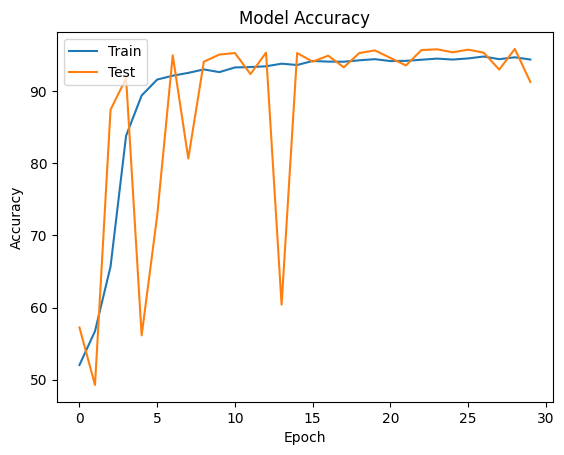

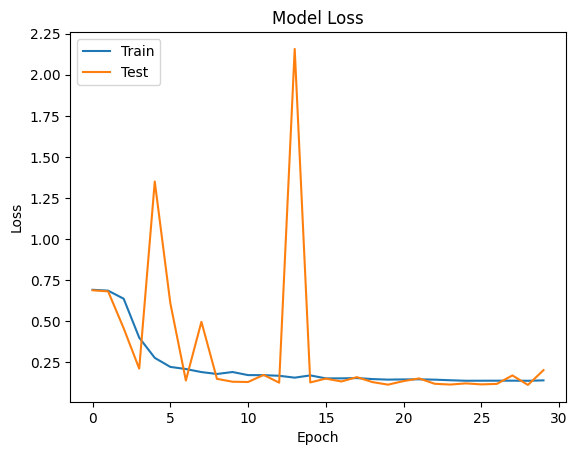

Words found are : 3306
Embedding(3306, 100)
-----------------------------------------------------------1-fold of the model-----------------------------------------------------------


100%|██████████| 241/241 [00:01<00:00, 199.27it/s]


| Train Loss : 0.6923404213896648 |  Val Loss : 0.6908780310006268 | Train Acc : 51.711124420166016 | Val Acc : 51.74388122558594 |


100%|██████████| 241/241 [00:01<00:00, 156.59it/s]


| Train Loss : 0.6876813794780103 |  Val Loss : 0.6823243646184831 | Train Acc : 57.16330337524414 | Val Acc : 58.7714729309082 |


100%|██████████| 241/241 [00:01<00:00, 171.27it/s]


| Train Loss : 0.6367494175088196 |  Val Loss : 0.7067024396971946 | Train Acc : 67.32595825195312 | Val Acc : 53.40968322753906 |


100%|██████████| 241/241 [00:01<00:00, 198.81it/s]


| Train Loss : 0.39845146875375265 |  Val Loss : 0.8008692610828533 | Train Acc : 83.30513763427734 | Val Acc : 70.48412322998047 |


100%|██████████| 241/241 [00:01<00:00, 198.03it/s]


| Train Loss : 0.26645274928970314 |  Val Loss : 0.31116542962458776 | Train Acc : 89.79830932617188 | Val Acc : 87.5585708618164 |


100%|██████████| 241/241 [00:01<00:00, 199.16it/s]


| Train Loss : 0.22030713038934696 |  Val Loss : 0.3263494559650478 | Train Acc : 91.3467788696289 | Val Acc : 88.287353515625 |


100%|██████████| 241/241 [00:01<00:00, 201.77it/s]


| Train Loss : 0.2008677882948865 |  Val Loss : 0.2876074333122036 | Train Acc : 92.24462890625 | Val Acc : 89.27642059326172 |


100%|██████████| 241/241 [00:01<00:00, 194.95it/s]


| Train Loss : 0.18254395571034995 |  Val Loss : 0.2043827227118024 | Train Acc : 93.19454193115234 | Val Acc : 92.45185089111328 |


100%|██████████| 241/241 [00:01<00:00, 198.59it/s]


| Train Loss : 0.18300257754174626 |  Val Loss : 0.17812882880047584 | Train Acc : 92.92127227783203 | Val Acc : 93.12857818603516 |


100%|██████████| 241/241 [00:01<00:00, 144.57it/s]


| Train Loss : 0.1649300431150388 |  Val Loss : 0.3035539599848918 | Train Acc : 93.79310607910156 | Val Acc : 88.65174865722656 |


100%|██████████| 241/241 [00:01<00:00, 196.76it/s]


| Train Loss : 0.1639644151654097 |  Val Loss : 0.18190986809031315 | Train Acc : 93.75406646728516 | Val Acc : 93.38886260986328 |


100%|██████████| 241/241 [00:01<00:00, 198.61it/s]


| Train Loss : 0.16321959705525257 |  Val Loss : 0.15720329817844084 | Train Acc : 93.81912994384766 | Val Acc : 94.32587432861328 |


100%|██████████| 241/241 [00:01<00:00, 199.49it/s]


| Train Loss : 0.1528499195986005 |  Val Loss : 0.2225131032099285 | Train Acc : 94.24854278564453 | Val Acc : 89.4325942993164 |


100%|██████████| 241/241 [00:01<00:00, 197.32it/s]


| Train Loss : 0.15084443898991517 |  Val Loss : 0.15929799064225916 | Train Acc : 93.84515380859375 | Val Acc : 93.75325775146484 |


100%|██████████| 241/241 [00:01<00:00, 200.23it/s]


| Train Loss : 0.15046292228300656 |  Val Loss : 0.15722747763181527 | Train Acc : 94.19648742675781 | Val Acc : 94.37793731689453 |


100%|██████████| 241/241 [00:01<00:00, 197.25it/s]


| Train Loss : 0.145378739028568 |  Val Loss : 0.1664634841566499 | Train Acc : 94.39167022705078 | Val Acc : 94.16970825195312 |


100%|██████████| 241/241 [00:01<00:00, 199.58it/s]


| Train Loss : 0.15123508948355274 |  Val Loss : 0.16531447354531548 | Train Acc : 94.01432037353516 | Val Acc : 93.59709167480469 |


100%|██████████| 241/241 [00:01<00:00, 145.79it/s]


| Train Loss : 0.14724956143189344 |  Val Loss : 0.16190764032215083 | Train Acc : 93.89720916748047 | Val Acc : 94.06559753417969 |


100%|██████████| 241/241 [00:01<00:00, 195.14it/s]


| Train Loss : 0.141272077897034 |  Val Loss : 0.5739466532014499 | Train Acc : 94.49577331542969 | Val Acc : 81.05154418945312 |


100%|██████████| 241/241 [00:01<00:00, 199.77it/s]


| Train Loss : 0.14215964772287096 |  Val Loss : 0.16400484106722077 | Train Acc : 94.67794036865234 | Val Acc : 93.80531311035156 |


100%|██████████| 241/241 [00:01<00:00, 201.48it/s]


| Train Loss : 0.1347261041606411 |  Val Loss : 0.166256741371892 | Train Acc : 94.65191650390625 | Val Acc : 93.909423828125 |


100%|██████████| 241/241 [00:01<00:00, 199.67it/s]


| Train Loss : 0.1384257459556157 |  Val Loss : 0.15641392855143843 | Train Acc : 94.72999572753906 | Val Acc : 94.01353454589844 |


100%|██████████| 241/241 [00:01<00:00, 196.23it/s]


| Train Loss : 0.13474686272544137 |  Val Loss : 0.15683438957683749 | Train Acc : 94.86011505126953 | Val Acc : 94.22176361083984 |


100%|██████████| 241/241 [00:01<00:00, 201.12it/s]


| Train Loss : 0.13406304760497348 |  Val Loss : 1.0182017532968966 | Train Acc : 94.78204345703125 | Val Acc : 60.02082061767578 |


100%|██████████| 241/241 [00:01<00:00, 197.45it/s]


| Train Loss : 0.15020592384083983 |  Val Loss : 0.1739108997737947 | Train Acc : 94.3135986328125 | Val Acc : 93.38886260986328 |


100%|██████████| 241/241 [00:01<00:00, 146.01it/s]


| Train Loss : 0.13141393483953917 |  Val Loss : 0.16486919681102383 | Train Acc : 94.89915466308594 | Val Acc : 93.80531311035156 |


100%|██████████| 241/241 [00:01<00:00, 200.35it/s]


| Train Loss : 0.12947438636560796 |  Val Loss : 0.18824590767113436 | Train Acc : 94.92517852783203 | Val Acc : 91.77511596679688 |


100%|██████████| 241/241 [00:01<00:00, 199.99it/s]


| Train Loss : 0.1271439982647235 |  Val Loss : 0.19853290222445333 | Train Acc : 95.120361328125 | Val Acc : 91.72306823730469 |


100%|██████████| 241/241 [00:01<00:00, 197.56it/s]


| Train Loss : 0.1314538532066981 |  Val Loss : 0.15292627423798558 | Train Acc : 94.83409881591797 | Val Acc : 94.5861587524414 |


100%|██████████| 241/241 [00:01<00:00, 199.88it/s]


| Train Loss : 0.12868604920310664 |  Val Loss : 0.16193202443432764 | Train Acc : 95.26349639892578 | Val Acc : 94.53409576416016 |


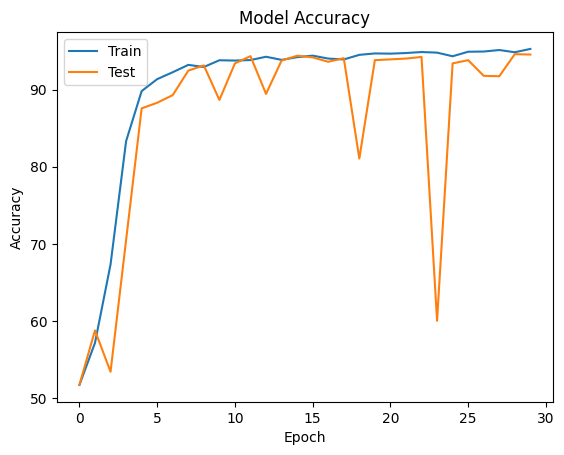

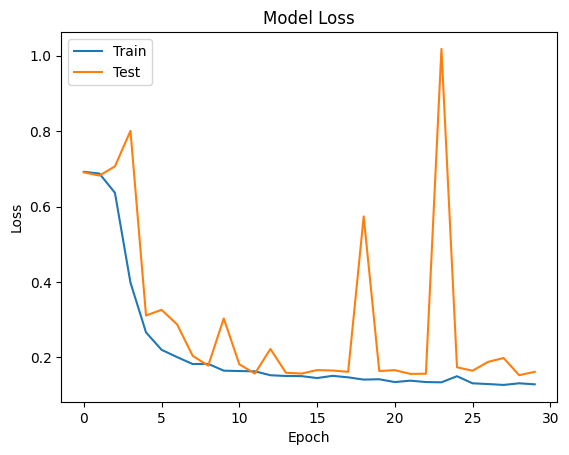

Words found are : 3306
Embedding(3306, 100)
-----------------------------------------------------------2-fold of the model-----------------------------------------------------------


100%|██████████| 241/241 [00:01<00:00, 198.25it/s]


| Train Loss : 0.6928631683100177 |  Val Loss : 0.6929035960293759 | Train Acc : 50.566036224365234 | Val Acc : 48.620513916015625 |


100%|██████████| 241/241 [00:01<00:00, 196.67it/s]


| Train Loss : 0.6881463932463622 |  Val Loss : 0.6939364616167166 | Train Acc : 55.211448669433594 | Val Acc : 48.620513916015625 |


100%|██████████| 241/241 [00:01<00:00, 178.16it/s]


| Train Loss : 0.6535769866477691 |  Val Loss : 0.40850754459967903 | Train Acc : 64.25504302978516 | Val Acc : 87.40239715576172 |


100%|██████████| 241/241 [00:01<00:00, 149.37it/s]


| Train Loss : 0.41072056057706 |  Val Loss : 0.3633311212194704 | Train Acc : 82.0429458618164 | Val Acc : 83.96669006347656 |


100%|██████████| 241/241 [00:01<00:00, 200.38it/s]


| Train Loss : 0.27230216465216606 |  Val Loss : 0.8700761845929743 | Train Acc : 89.69420623779297 | Val Acc : 68.4018783569336 |


100%|██████████| 241/241 [00:01<00:00, 198.92it/s]


| Train Loss : 0.23313487498410818 |  Val Loss : 0.1549632800883579 | Train Acc : 91.45088195800781 | Val Acc : 95.00260925292969 |


100%|██████████| 241/241 [00:01<00:00, 200.85it/s]


| Train Loss : 0.21671892026670778 |  Val Loss : 0.17014126902381185 | Train Acc : 91.84124755859375 | Val Acc : 93.49298095703125 |


100%|██████████| 241/241 [00:01<00:00, 197.55it/s]


| Train Loss : 0.20673126081948787 |  Val Loss : 0.16409351023952518 | Train Acc : 91.95835876464844 | Val Acc : 93.96148681640625 |


100%|██████████| 241/241 [00:01<00:00, 196.44it/s]


| Train Loss : 0.17499848932279885 |  Val Loss : 0.9877459016211141 | Train Acc : 93.01235961914062 | Val Acc : 61.99896240234375 |


100%|██████████| 241/241 [00:01<00:00, 200.01it/s]


| Train Loss : 0.18233752686557012 |  Val Loss : 1.2416002255195886 | Train Acc : 92.56993865966797 | Val Acc : 55.439876556396484 |


100%|██████████| 241/241 [00:01<00:00, 177.37it/s]


| Train Loss : 0.17840070145116196 |  Val Loss : 0.34771599911079626 | Train Acc : 93.24658203125 | Val Acc : 84.90370178222656 |


100%|██████████| 241/241 [00:01<00:00, 149.85it/s]


| Train Loss : 0.16799024503263624 |  Val Loss : 0.21406945939922878 | Train Acc : 93.4027328491211 | Val Acc : 90.36959838867188 |


100%|██████████| 241/241 [00:01<00:00, 200.81it/s]


| Train Loss : 0.159530786563998 |  Val Loss : 0.2570799741344231 | Train Acc : 93.64996337890625 | Val Acc : 88.49557495117188 |


100%|██████████| 241/241 [00:01<00:00, 201.05it/s]


| Train Loss : 0.15619608134748722 |  Val Loss : 0.36631233057027557 | Train Acc : 94.11841583251953 | Val Acc : 86.04893493652344 |


100%|██████████| 241/241 [00:01<00:00, 200.94it/s]


| Train Loss : 0.159268584917254 |  Val Loss : 0.3243862747862927 | Train Acc : 93.75406646728516 | Val Acc : 86.77772521972656 |


100%|██████████| 241/241 [00:01<00:00, 199.40it/s]


| Train Loss : 0.1571639882409115 |  Val Loss : 0.14538360517888965 | Train Acc : 93.78009796142578 | Val Acc : 94.1176528930664 |


100%|██████████| 241/241 [00:01<00:00, 200.25it/s]


| Train Loss : 0.14740993899178723 |  Val Loss : 0.16372128310557582 | Train Acc : 94.13143157958984 | Val Acc : 93.54502868652344 |


100%|██████████| 241/241 [00:01<00:00, 199.09it/s]


| Train Loss : 0.14635012257570326 |  Val Loss : 0.1501839742193436 | Train Acc : 94.23552703857422 | Val Acc : 94.27381896972656 |


100%|██████████| 241/241 [00:01<00:00, 178.70it/s]


| Train Loss : 0.14305643279713784 |  Val Loss : 0.17947145509409956 | Train Acc : 94.4697494506836 | Val Acc : 92.7121353149414 |


100%|██████████| 241/241 [00:01<00:00, 150.82it/s]


| Train Loss : 0.1436700961538624 |  Val Loss : 0.15352587877660756 | Train Acc : 94.26155090332031 | Val Acc : 93.909423828125 |


100%|██████████| 241/241 [00:01<00:00, 198.73it/s]


| Train Loss : 0.14141732160542486 |  Val Loss : 0.17615112801553184 | Train Acc : 94.52179718017578 | Val Acc : 93.28475189208984 |


100%|██████████| 241/241 [00:01<00:00, 199.55it/s]


| Train Loss : 0.14225340987529628 |  Val Loss : 0.13927400947566873 | Train Acc : 94.45673370361328 | Val Acc : 94.846435546875 |


100%|██████████| 241/241 [00:01<00:00, 196.74it/s]


| Train Loss : 0.13890791748278933 |  Val Loss : 0.2800537419914113 | Train Acc : 94.71698760986328 | Val Acc : 87.92295837402344 |


100%|██████████| 241/241 [00:01<00:00, 200.68it/s]


| Train Loss : 0.1381233453125285 |  Val Loss : 0.17605529736120493 | Train Acc : 94.69095611572266 | Val Acc : 93.75325775146484 |


100%|██████████| 241/241 [00:01<00:00, 198.12it/s]


| Train Loss : 0.13697080790254887 |  Val Loss : 0.14663463744069685 | Train Acc : 94.69095611572266 | Val Acc : 94.95055389404297 |


100%|██████████| 241/241 [00:01<00:00, 196.83it/s]


| Train Loss : 0.17213714002360753 |  Val Loss : 0.2987744291155429 | Train Acc : 93.49382019042969 | Val Acc : 88.39146423339844 |


100%|██████████| 241/241 [00:01<00:00, 186.35it/s]


| Train Loss : 0.1523944845810901 |  Val Loss : 0.17320004059026045 | Train Acc : 94.30058288574219 | Val Acc : 93.23269653320312 |


100%|██████████| 241/241 [00:01<00:00, 146.07it/s]


| Train Loss : 0.14013012507475947 |  Val Loss : 0.18307565085777508 | Train Acc : 94.53480529785156 | Val Acc : 93.49298095703125 |


100%|██████████| 241/241 [00:01<00:00, 197.11it/s]


| Train Loss : 0.1404176692859492 |  Val Loss : 0.1381136083510985 | Train Acc : 94.4046859741211 | Val Acc : 95.26288604736328 |


100%|██████████| 241/241 [00:01<00:00, 199.61it/s]


| Train Loss : 0.13866866633305708 |  Val Loss : 0.16960314618746467 | Train Acc : 94.84710693359375 | Val Acc : 93.54502868652344 |


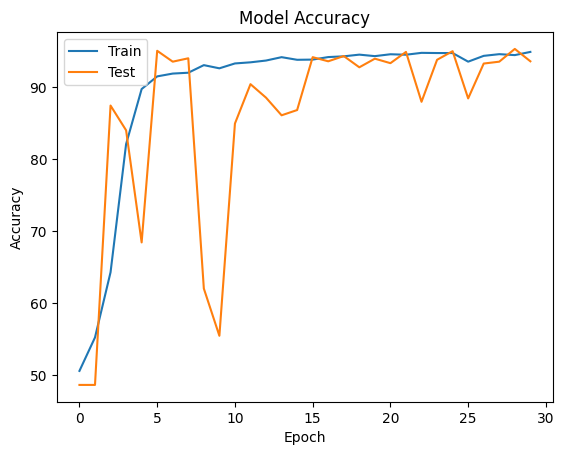

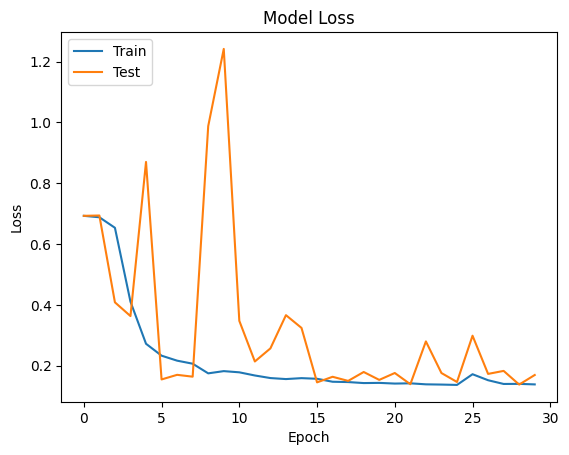

Words found are : 3306
Embedding(3306, 100)
-----------------------------------------------------------3-fold of the model-----------------------------------------------------------


100%|██████████| 241/241 [00:01<00:00, 198.57it/s]


| Train Loss : 0.692398288285647 |  Val Loss : 0.6920994600859984 | Train Acc : 51.307743072509766 | Val Acc : 48.672569274902344 |


100%|██████████| 241/241 [00:01<00:00, 198.70it/s]


| Train Loss : 0.6884803891181945 |  Val Loss : 0.6857153989882719 | Train Acc : 55.06831359863281 | Val Acc : 56.4289436340332 |


100%|██████████| 241/241 [00:01<00:00, 197.08it/s]


| Train Loss : 0.6606790990277243 |  Val Loss : 0.5044093765609281 | Train Acc : 63.22706985473633 | Val Acc : 74.90890502929688 |


100%|██████████| 241/241 [00:01<00:00, 196.69it/s]


| Train Loss : 0.4248862553375762 |  Val Loss : 0.2484192633608677 | Train Acc : 81.52244567871094 | Val Acc : 91.35867309570312 |


100%|██████████| 241/241 [00:01<00:00, 166.19it/s]


| Train Loss : 0.28021171405019507 |  Val Loss : 0.18993636514537737 | Train Acc : 89.17371368408203 | Val Acc : 92.55596160888672 |


100%|██████████| 241/241 [00:01<00:00, 154.52it/s]


| Train Loss : 0.23187827877918465 |  Val Loss : 0.2724044100245202 | Train Acc : 91.33377075195312 | Val Acc : 89.4325942993164 |


100%|██████████| 241/241 [00:01<00:00, 194.30it/s]


| Train Loss : 0.20254612026824606 |  Val Loss : 0.17874945505129008 | Train Acc : 92.4658432006836 | Val Acc : 93.59709167480469 |


100%|██████████| 241/241 [00:01<00:00, 191.05it/s]


| Train Loss : 0.19524113980976884 |  Val Loss : 0.17007888860337317 | Train Acc : 92.3096923828125 | Val Acc : 93.59709167480469 |


100%|██████████| 241/241 [00:01<00:00, 196.34it/s]


| Train Loss : 0.18069324793297709 |  Val Loss : 0.18405805850854334 | Train Acc : 92.90826416015625 | Val Acc : 92.55596160888672 |


100%|██████████| 241/241 [00:01<00:00, 195.06it/s]


| Train Loss : 0.17714487586531572 |  Val Loss : 0.16553629070078252 | Train Acc : 92.99935150146484 | Val Acc : 93.75325775146484 |


100%|██████████| 241/241 [00:01<00:00, 196.08it/s]


| Train Loss : 0.1677964966759939 |  Val Loss : 0.16021417995613263 | Train Acc : 93.58490753173828 | Val Acc : 93.33680725097656 |


100%|██████████| 241/241 [00:01<00:00, 197.64it/s]


| Train Loss : 0.16779017911408345 |  Val Loss : 0.18791294706823428 | Train Acc : 93.62393951416016 | Val Acc : 92.7121353149414 |


100%|██████████| 241/241 [00:01<00:00, 161.49it/s]


| Train Loss : 0.16353475757636415 |  Val Loss : 0.16340682882840324 | Train Acc : 93.71502685546875 | Val Acc : 94.32587432861328 |


100%|██████████| 241/241 [00:01<00:00, 158.94it/s]


| Train Loss : 0.16758934174244405 |  Val Loss : 0.15489665195971286 | Train Acc : 93.83213806152344 | Val Acc : 93.54502868652344 |


100%|██████████| 241/241 [00:01<00:00, 195.56it/s]


| Train Loss : 0.15727240371874732 |  Val Loss : 0.5529281492249285 | Train Acc : 93.88419342041016 | Val Acc : 73.295166015625 |


100%|██████████| 241/241 [00:01<00:00, 198.18it/s]


| Train Loss : 0.1567355316338325 |  Val Loss : 0.6340519958396308 | Train Acc : 93.83213806152344 | Val Acc : 67.15252685546875 |


100%|██████████| 241/241 [00:01<00:00, 197.40it/s]


| Train Loss : 0.15575911364819256 |  Val Loss : 0.21640396728274888 | Train Acc : 94.01432037353516 | Val Acc : 91.25455474853516 |


100%|██████████| 241/241 [00:01<00:00, 193.74it/s]


| Train Loss : 0.15063186222754016 |  Val Loss : 0.16017980578371005 | Train Acc : 94.07937622070312 | Val Acc : 93.44091796875 |


100%|██████████| 241/241 [00:01<00:00, 200.48it/s]


| Train Loss : 0.14693946475787215 |  Val Loss : 0.5667691267386877 | Train Acc : 94.4697494506836 | Val Acc : 80.58303833007812 |


100%|██████████| 241/241 [00:01<00:00, 197.13it/s]


| Train Loss : 0.14472801385661885 |  Val Loss : 0.2369176786475224 | Train Acc : 94.3526382446289 | Val Acc : 91.3066177368164 |


100%|██████████| 241/241 [00:01<00:00, 162.81it/s]


| Train Loss : 0.1465779314785905 |  Val Loss : 0.15290575533841563 | Train Acc : 94.3396224975586 | Val Acc : 93.80531311035156 |


100%|██████████| 241/241 [00:01<00:00, 159.18it/s]


| Train Loss : 0.1414959540036819 |  Val Loss : 0.1522265797105697 | Train Acc : 94.45673370361328 | Val Acc : 94.95055389404297 |


100%|██████████| 241/241 [00:01<00:00, 141.90it/s]


| Train Loss : 0.13991221337637966 |  Val Loss : 0.2196870859374691 | Train Acc : 94.52179718017578 | Val Acc : 92.08746337890625 |


100%|██████████| 241/241 [00:01<00:00, 198.89it/s]


| Train Loss : 0.14174357985201483 |  Val Loss : 0.28213221382956716 | Train Acc : 94.69095611572266 | Val Acc : 88.91202545166016 |


100%|██████████| 241/241 [00:01<00:00, 197.56it/s]


| Train Loss : 0.135307669443022 |  Val Loss : 0.14434582425328918 | Train Acc : 94.72999572753906 | Val Acc : 93.75325775146484 |


100%|██████████| 241/241 [00:01<00:00, 195.80it/s]


| Train Loss : 0.13564524413580312 |  Val Loss : 0.14010218661162133 | Train Acc : 94.4697494506836 | Val Acc : 94.48204803466797 |


100%|██████████| 241/241 [00:01<00:00, 196.41it/s]


| Train Loss : 0.13512435636507977 |  Val Loss : 0.1455006830284034 | Train Acc : 94.63890838623047 | Val Acc : 94.5861587524414 |


100%|██████████| 241/241 [00:01<00:00, 194.55it/s]


| Train Loss : 0.13716103985909284 |  Val Loss : 0.13780155310960934 | Train Acc : 94.83409881591797 | Val Acc : 94.95055389404297 |


100%|██████████| 241/241 [00:01<00:00, 148.09it/s]


| Train Loss : 0.13076082068939604 |  Val Loss : 0.17211438048030273 | Train Acc : 95.00325012207031 | Val Acc : 93.44091796875 |


100%|██████████| 241/241 [00:01<00:00, 182.47it/s]


| Train Loss : 0.13104863186005114 |  Val Loss : 0.15149385894938164 | Train Acc : 95.05530548095703 | Val Acc : 93.59709167480469 |


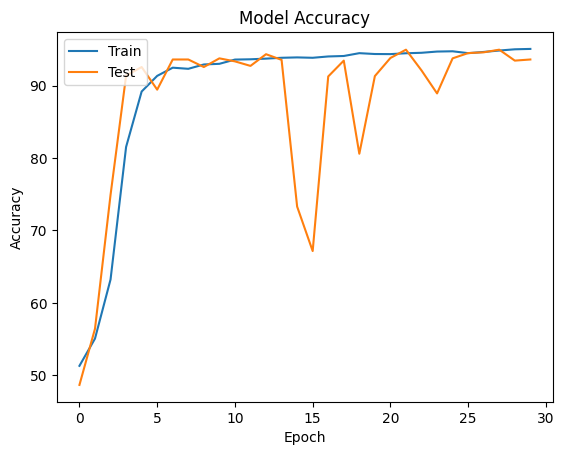

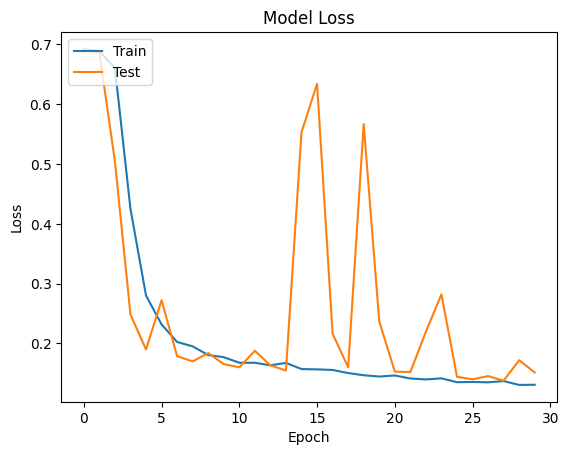

Words found are : 3306
Embedding(3306, 100)
-----------------------------------------------------------4-fold of the model-----------------------------------------------------------


100%|██████████| 241/241 [00:01<00:00, 196.77it/s]


| Train Loss : 0.6918435452196919 |  Val Loss : 0.6902097234621698 | Train Acc : 52.58295440673828 | Val Acc : 50.546592712402344 |


100%|██████████| 241/241 [00:01<00:00, 197.10it/s]


| Train Loss : 0.685701554358277 |  Val Loss : 0.681237340687092 | Train Acc : 56.564735412597656 | Val Acc : 63.30036544799805 |


100%|██████████| 241/241 [00:01<00:00, 195.68it/s]


| Train Loss : 0.6106106813921894 |  Val Loss : 1.026135763135011 | Train Acc : 68.4059829711914 | Val Acc : 52.73295593261719 |


100%|██████████| 241/241 [00:01<00:00, 196.46it/s]


| Train Loss : 0.35373436062073815 |  Val Loss : 1.5946799495767943 | Train Acc : 85.27000427246094 | Val Acc : 49.505470275878906 |


100%|██████████| 241/241 [00:01<00:00, 196.51it/s]


| Train Loss : 0.27383451920654683 |  Val Loss : 0.197895112300058 | Train Acc : 89.5901107788086 | Val Acc : 93.64913940429688 |


100%|██████████| 241/241 [00:01<00:00, 175.56it/s]


| Train Loss : 0.2336940237926289 |  Val Loss : 0.1935274987590617 | Train Acc : 91.26870727539062 | Val Acc : 92.45185089111328 |


100%|██████████| 241/241 [00:01<00:00, 141.90it/s]


| Train Loss : 0.1940728271753323 |  Val Loss : 0.1683349893241733 | Train Acc : 92.5309066772461 | Val Acc : 93.70120239257812 |


100%|██████████| 241/241 [00:01<00:00, 196.74it/s]


| Train Loss : 0.18637916734254276 |  Val Loss : 0.7457665909704195 | Train Acc : 92.94729614257812 | Val Acc : 72.1499252319336 |


100%|██████████| 241/241 [00:01<00:00, 193.19it/s]


| Train Loss : 0.19113667524148872 |  Val Loss : 0.15506357627880568 | Train Acc : 92.68704986572266 | Val Acc : 94.42998504638672 |


100%|██████████| 241/241 [00:01<00:00, 194.88it/s]


| Train Loss : 0.16847375872397702 |  Val Loss : 0.14336512792993186 | Train Acc : 93.63695526123047 | Val Acc : 94.32587432861328 |


100%|██████████| 241/241 [00:01<00:00, 195.07it/s]


| Train Loss : 0.17798359338957612 |  Val Loss : 0.1658362785823554 | Train Acc : 92.93428802490234 | Val Acc : 93.44091796875 |


100%|██████████| 241/241 [00:01<00:00, 191.80it/s]


| Train Loss : 0.16035814371369608 |  Val Loss : 0.17653847331028938 | Train Acc : 93.85816192626953 | Val Acc : 92.76419067382812 |


100%|██████████| 241/241 [00:01<00:00, 194.18it/s]


| Train Loss : 0.16242918449907856 |  Val Loss : 0.19440278176650724 | Train Acc : 93.63695526123047 | Val Acc : 92.60802459716797 |


100%|██████████| 241/241 [00:01<00:00, 167.80it/s]


| Train Loss : 0.16016840928354742 |  Val Loss : 0.15091961646963536 | Train Acc : 93.67599487304688 | Val Acc : 94.48204803466797 |


100%|██████████| 241/241 [00:01<00:00, 149.73it/s]


| Train Loss : 0.1525644560843202 |  Val Loss : 0.1736287310728459 | Train Acc : 94.3135986328125 | Val Acc : 93.54502868652344 |


100%|██████████| 241/241 [00:01<00:00, 191.95it/s]


| Train Loss : 0.1493326180616349 |  Val Loss : 0.15267513481776954 | Train Acc : 94.11841583251953 | Val Acc : 93.909423828125 |


100%|██████████| 241/241 [00:01<00:00, 192.60it/s]


| Train Loss : 0.14657673035489568 |  Val Loss : 0.15652666177856603 | Train Acc : 94.3396224975586 | Val Acc : 93.909423828125 |


100%|██████████| 241/241 [00:01<00:00, 194.39it/s]


| Train Loss : 0.14601824673628294 |  Val Loss : 0.16180777789361656 | Train Acc : 94.56082916259766 | Val Acc : 93.80531311035156 |


100%|██████████| 241/241 [00:01<00:00, 196.30it/s]


| Train Loss : 0.14060195586901636 |  Val Loss : 0.17513418936096461 | Train Acc : 94.63890838623047 | Val Acc : 93.28475189208984 |


100%|██████████| 241/241 [00:01<00:00, 195.48it/s]


| Train Loss : 0.14020419954240476 |  Val Loss : 0.13787629757704817 | Train Acc : 94.62589263916016 | Val Acc : 94.69026947021484 |


100%|██████████| 241/241 [00:01<00:00, 194.82it/s]


| Train Loss : 0.14101690558077998 |  Val Loss : 1.585578250239629 | Train Acc : 94.57384490966797 | Val Acc : 50.65070343017578 |


100%|██████████| 241/241 [00:01<00:00, 165.78it/s]


| Train Loss : 0.19450565858676827 |  Val Loss : 0.30155674842482494 | Train Acc : 92.84320831298828 | Val Acc : 89.06819915771484 |


100%|██████████| 241/241 [00:01<00:00, 155.08it/s]


| Train Loss : 0.15407143515197194 |  Val Loss : 0.14335261568665128 | Train Acc : 94.05335235595703 | Val Acc : 94.48204803466797 |


100%|██████████| 241/241 [00:01<00:00, 196.26it/s]


| Train Loss : 0.1402175403021339 |  Val Loss : 0.185964222912585 | Train Acc : 94.70397186279297 | Val Acc : 92.81624603271484 |


100%|██████████| 241/241 [00:01<00:00, 195.16it/s]


| Train Loss : 0.13826310451135826 |  Val Loss : 0.15071955326806905 | Train Acc : 94.65191650390625 | Val Acc : 93.54502868652344 |


100%|██████████| 241/241 [00:01<00:00, 196.71it/s]


| Train Loss : 0.1332441324837113 |  Val Loss : 0.2031042733209577 | Train Acc : 94.92517852783203 | Val Acc : 91.93128967285156 |


100%|██████████| 241/241 [00:01<00:00, 195.87it/s]


| Train Loss : 0.1331504298709745 |  Val Loss : 0.14733703871961065 | Train Acc : 94.97722625732422 | Val Acc : 94.5861587524414 |


100%|██████████| 241/241 [00:01<00:00, 190.69it/s]


| Train Loss : 0.13189698158919075 |  Val Loss : 0.14671088794939838 | Train Acc : 94.97722625732422 | Val Acc : 94.32587432861328 |


100%|██████████| 241/241 [00:01<00:00, 195.19it/s]


| Train Loss : 0.12928701036148593 |  Val Loss : 0.21487973381429212 | Train Acc : 95.01626586914062 | Val Acc : 91.25455474853516 |


100%|██████████| 241/241 [00:01<00:00, 164.48it/s]


| Train Loss : 0.13125383869812096 |  Val Loss : 0.157045721988359 | Train Acc : 95.01626586914062 | Val Acc : 93.96148681640625 |


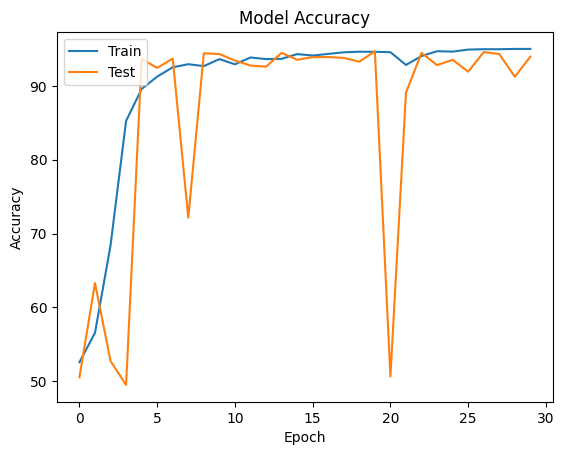

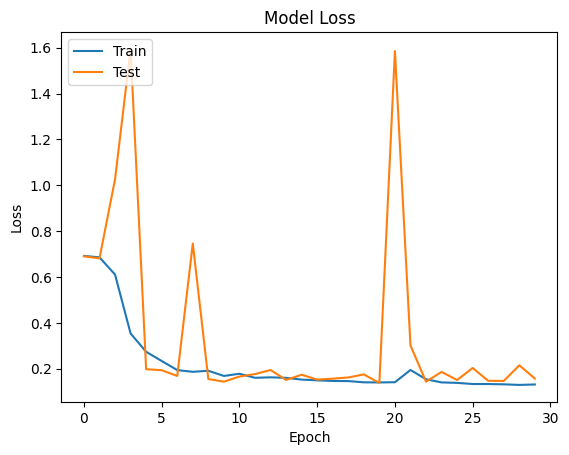

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


# sfk = StratifiedKFold(n_splits = config.FOLDS)
kfold = KFold(n_splits = config.FOLDS)
model_state_dicts = {}

for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(dataset)))):

    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)

    train_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = train_sampler, collate_fn = MyCollate(0, config.MAX_LEN))
    val_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = val_sampler, collate_fn = MyCollate(0, config.MAX_LEN))

    VOCAB_SIZE = len(dataset.source_vocab)
    HIDDEN_DIM = 128
    OUTPUT_DIM = 1
    VOCAB = list(dataset.source_vocab.stoi)

    embedding_layer = get_emb_layer_with_weights(target_vocab = VOCAB, emb_model = fasttext_model, trainable = False)

    model = Model(VOCAB_SIZE, config.EMB_DIM, HIDDEN_DIM, OUTPUT_DIM, embedding_layer)
    model = model.to(config.DEVICE)

#     model
#     model = Model(2, len(dataset.source_vocab), 128, 100, 1 ).to(config.DEVICE)
#     hidden = model.init_hidden(config.BATCH_SIZE)
#     model.hidden = hidden

    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    print(f"-----------------------------------------------------------{fold}-fold of the model-----------------------------------------------------------")
    for epoch in range(config.EPOCHS):
        train_loss, train_correct = train_epochs(train_loader, model, loss_fn, optimizer)
        val_loss, val_correct = val_epochs(val_loader, model, loss_fn)

        train_loss = train_loss/len(train_loader.sampler)
        val_loss = val_loss/len(val_loader.sampler)
        train_acc = (train_correct/len(train_loader.sampler))*100
        val_acc = (val_correct/len(val_loader.sampler))*100

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc.cpu().numpy().tolist())
        val_accs.append(val_acc.cpu().numpy().tolist())

        print(f"| Train Loss : {train_loss} |", end = " ")
        print(f" Val Loss : {val_loss} |", end = " ")
        print(f"Train Acc : {train_acc} |", end = " ")
        print(f"Val Acc : {val_acc} |")


    # Saving the state dicts for the model
    model_state_dicts.update({f"LSTM-Model-for-{fold}" : model.state_dict(),
                             f"Model-Optimizer-for-{fold}" : optimizer.state_dict()})

    # summarize history for accuracy
    plt.plot(train_accs)
    plt.plot(val_accs)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(train_losses)
    plt.plot(val_losses)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [ ]:
torch.save(model_state_dicts, "My-Model.pt")

<h1  style="text-align: center" class="list-group-item list-group-item-action active">7. Inference</h1><a id = "7" ></a>

In [ ]:
def numericalize(text):

    numerialized_source = []
    numerialized_source = [dataset.source_vocab.stoi["<SOS>"]]
    numerialized_source += dataset.source_vocab.numericalize(text)
    numerialized_source.append(dataset.source_vocab.stoi["<EOS>"])

    return numerialized_source

def padding(source):
    padded_sequence = torch.zeros(config.MAX_LEN, 1, dtype = torch.int)
    source = torch.tensor(source)

    if len(source) > config.MAX_LEN:
        padded_sequence[:, 0] = source[: config.MAX_LEN]
    else:
        padded_sequence[:len(source), 0] = padded_sequence[:len(source), 0] + source

    return padded_sequence

In [ ]:
def infer_processing(text):

    text = preprocessing(text)
    text = numericalize(text)
    text = padding(text)
    return text

In [ ]:
aspects = ["phone", "camera", "battery", "neutral", "processor"]

def get_similarity(text, aspect):
    try:
#         text = " ".join(text)
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

def best_aspect(text, aspects):
    a = []

    for aspect in aspects:
        a.append(get_similarity(text, aspect))

    return aspects[np.argmax(a)]


In [ ]:

sample = "I am really impressed with the phone's great battery backup."

ba = best_aspect(preprocessing(sample), aspects)

a = infer_processing(sample).to(config.DEVICE)

In [ ]:
model.eval()
sentiment = model(a)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

In [ ]:
print(f"The reviewer is talking {sentiment} about the {ba} of the phone in his/her comment")

The reviewer is talking Positively about the battery of the phone in his/her comment


<h1  style="text-align: center" class="list-group-item list-group-item-action active">8. References</h1><a id = "8" ></a>


- [A Practical Introduction to Web Scraping in Python](https://realpython.com/python-web-scraping-practical-introduction/)
- [Python SQLite](https://www.geeksforgeeks.org/python-sqlite/)
- [What on Earth is Unicode Normalization?](https://towardsdatascience.comwhat-on-earth-is-unicode-normalization-56c005c55ad0)
- [How to handle Emoji ‘😄’ & Emoticon ‘ :-) ’ in text preprocessing?](https://medium.com/geekculture/text-preprocessing-how-to-handle-emoji-emoticon-641bbfa6e9e7)
- [Spelling checker in Python](https://www.geeksforgeeks.org/spelling-checker-in-python/)
- [NLPAUG – A Python library to Augment Your Text Data](https://www.analyticsvidhya.com/blog/2021/08/nlpaug-a-python-library-to-augment-your-text-data/)
- [Topic Modeling in Python: Latent Dirichlet Allocation (LDA)](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)